In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [2]:
## Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv('/content/drive/MyDrive/upgrad_lending/loan.csv')

# **Data Understanding: Identifying data quality issues and the meanings of the variables**

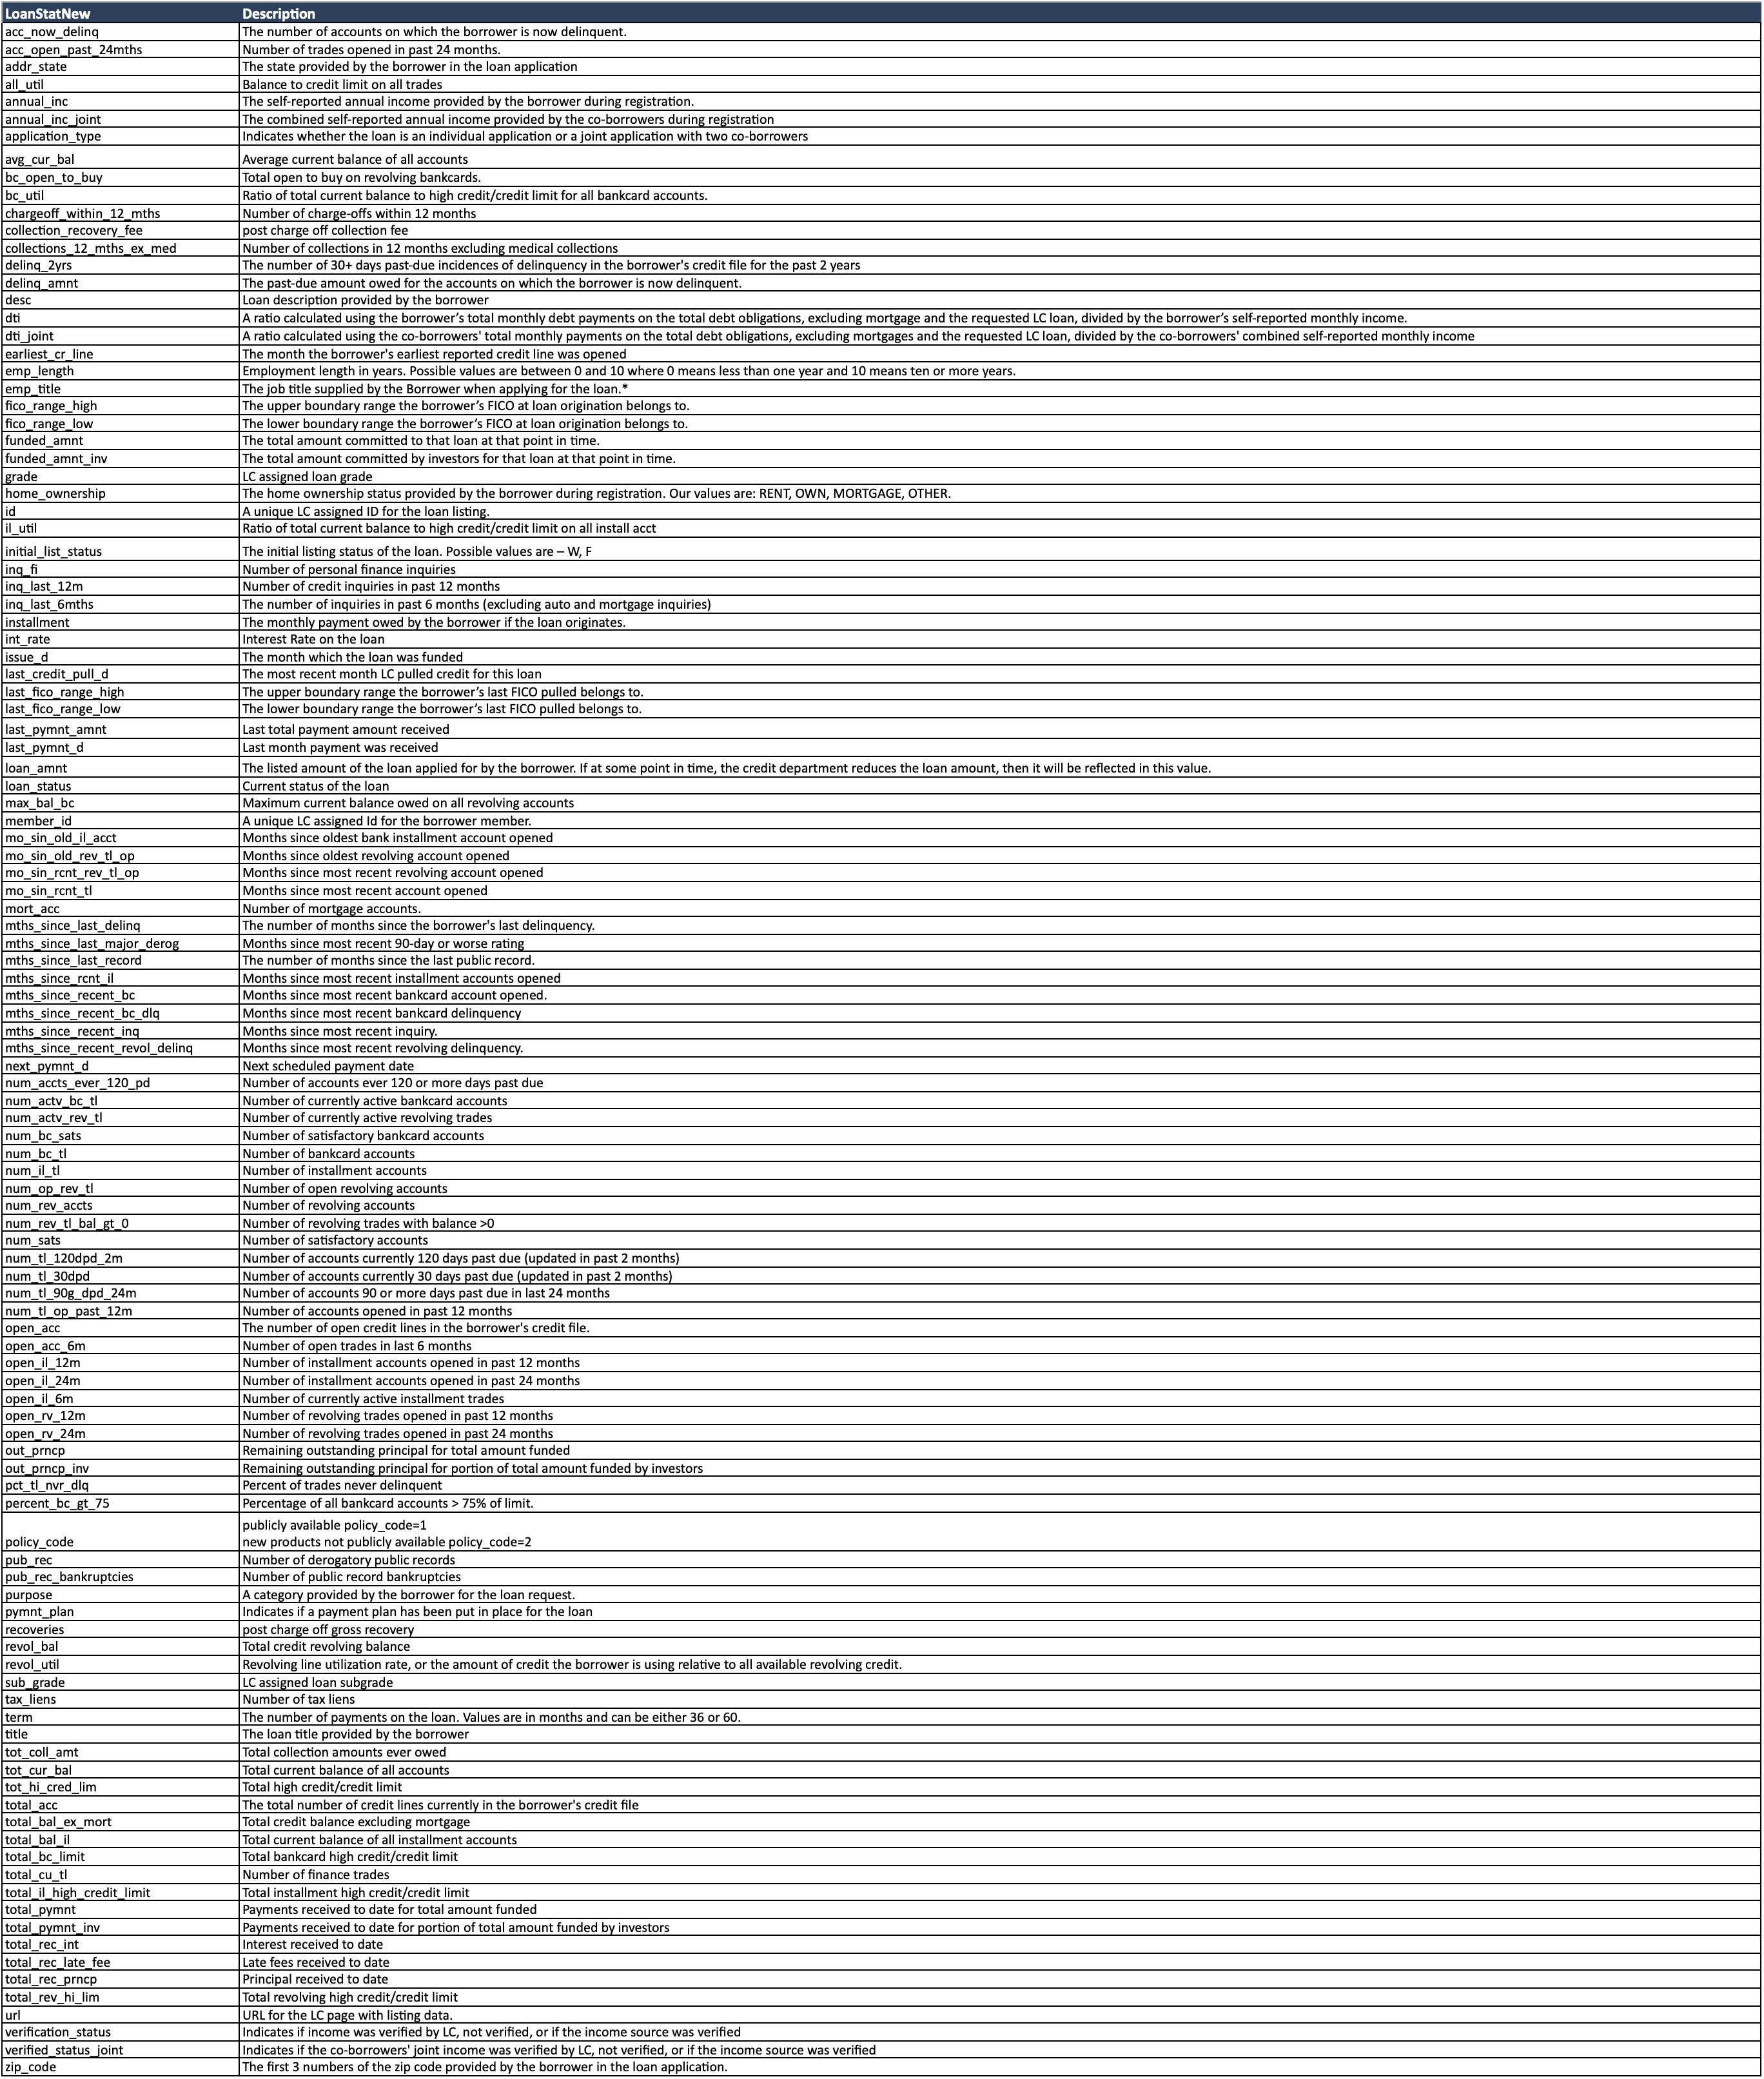

In [4]:
data.shape

(39717, 111)

In [5]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


**Checking for Null values in dataset**

In [6]:
data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [7]:
# Identify datatype of loan data
print(data.info())
print(data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object


# **Data cleaning Process**

**Percentage of Null values in dataset**

In [8]:
null_col = (data.isnull().sum()/len(data.index))*100
#Finding percentage of null or missing values
null_percentage = round(100*(data.isnull().sum()/len(data.index)), 2)
#Printing columns which have more than 0% missing values
null_percentage[ null_percentage > 0 ]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

In [9]:
# Finding columns with more than 100% missing values
columns_with_missing_values = null_percentage[null_percentage == 100]
columns_with_missing_values.count()

54

**Removing the null columns which are 100%**

In [10]:
data.dropna(axis = 1, how = 'all', inplace = True)


In [11]:
data.shape

(39717, 57)

**Checking unique values**

In [12]:
unique_value_counts = data.nunique()
print(unique_value_counts)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

We have identified columns in the dataset with characteristics that make them less valuable for analysis:

Unique Value Columns: The following columns have only one unique value in all the rows, which means they do not provide useful information for analysis and can be removed:
'tax_liens'
'delinq_amnt'
'chargeoff_within_12_mths'
'acc_now_delinq'
'application_type'
'policy_code'
'collections_12_mths_ex_med'
'initial_list_status'
'pymnt_plan'
These columns contain the same value throughout the dataset, making them redundant for any meaningful analysis. Removing them will simplify the dataset and reduce unnecessary computational overhead.

Removing single valued columns form the dataset

In [13]:
single_value_col = ['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type', 'acc_now_delinq','chargeoff_within_12_mths', 'delinq_amnt','tax_liens']
data.drop(columns = single_value_col, axis=1, inplace=True)
data.shape

(39717, 48)

**We now have 48 columns . Lets remove columns with more than 60% null values**

In [14]:
null_col[(null_col > 60) & (null_col < 100)]


mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
next_pymnt_d              97.129693
dtype: float64


**Removing columns which have more than 60% null values**

In [15]:
data.drop(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis=1, inplace=True)

In [16]:
data.shape

(39717, 45)

**Removing categorical data from dataset, string and fields which won't contribute to default prediction analysis**

In [17]:
unique_value_counts2 = data.nunique()
print(unique_value_counts2)

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
desc                       26527
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util

In [18]:
#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00


In [19]:
data.drop(["id", "member_id", "title", "url", "emp_title", "zip_code","addr_state","desc"], axis = 1, inplace = True)

# **Removing features on the basis of business logic**

In our analysis focused on understanding user details and the driving factors behind loan defaulting, we need to ensure that we retain only the columns relevant to loan application details, as post-loan approval features are not pertinent to our investigation.

We have identified the following columns, corresponding to post-loan approval scenarios, which can be safely removed as they do not contribute to the understanding of loan defaulting and contain irrelevant information:

delinq_2yrs: This column pertains to the borrower's delinquency history, which is not relevant to the loan application stage.

revol_bal: The revolving balance of borrowers, which is also not a relevant factor during loan application analysis.

out_prncp and out_prncp_inv: These columns represent the outstanding principal balance on loans, which becomes relevant only after loan approval and disbursement.

total_pymnt, total_rec_prncp, total_rec_int, and total_rec_late_fee: These columns contain information about payments, including interest and late fees, received on the loan, which is not applicable to loan applications.

recoveries and collection_recovery_fee: These columns are only relevant for charged-off loans and do not pertain to the loan application stage.

last_pymnt_d and last_pymnt_amnt: These columns relate to the last payment date and amount, which are post-loan approval details and not necessary for our pre-approval analysis.

By removing these post-loan approval features, we can focus our analysis on the loan application details and better understand the factors influencing loan defaulting at the initial stage.

In [20]:
data.drop(['delinq_2yrs', 'revol_bal', 'total_pymnt', 'total_rec_prncp','total_rec_int', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt'], axis=1, inplace=True)


In [21]:
data.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [22]:
data.shape

(39717, 24)

In [23]:
unique_value_counts3 = data.nunique()
print(unique_value_counts3)

loan_amnt                 885
funded_amnt              1041
funded_amnt_inv          8205
term                        2
int_rate                  371
installment             15383
grade                       7
sub_grade                  35
emp_length                 11
home_ownership              5
annual_inc               5318
verification_status         3
issue_d                    55
loan_status                 3
purpose                    14
dti                      2868
earliest_cr_line          526
inq_last_6mths              9
open_acc                   40
pub_rec                     5
revol_util               1089
total_acc                  82
total_pymnt_inv         37518
pub_rec_bankruptcies        3
dtype: int64


**Now we have 24 columns which are relevant for our analysis**


1. loan_amnt                 885
2. funded_amnt              1041
3. funded_amnt_inv          8205
4. term                        2
5. int_rate                  371
6. installment             15383
7. grade                       7
8. sub_grade                  35
9. emp_length                 11
10. home_ownership              5
11. annual_inc               5318
12. verification_status         3
13. issue_d                    55
14. loan_status                 3
15. purpose                    14
16. dti                      2868
17. earliest_cr_line          526
18. inq_last_6mths              9
19. open_acc                   40
20. pub_rec                     5
21. revol_util               1089
22. total_acc                  82
23. total_pymnt_inv         37518
24. pub_rec_bankruptcies        3


# **Handling missing values**

In [24]:
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

emp_length             2.71
revol_util             0.13
pub_rec_bankruptcies   1.75
dtype: float64

**Removing the the null valued rows in the above columns.**

In [25]:
data.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

Series([], dtype: float64)

In [26]:
data.shape

(37898, 24)

The primary objective of our analysis is to identify parameters that can predict loan defaults accurately. This determination is only possible for loans that have either been fully paid or charged off. Consequently, we must exclude data related to current loans, as making predictions for these loans would be speculative.
1. To achieve this, we will remove records associated with loans that are currently in progress or have a status of "current." This ensures that our analysis is focused on historical data where loan outcomes are known and can be used to inform our predictive modeling.

In [27]:
data = data[data.loan_status != "Current"]
data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

### Checking for missing values

In [28]:
(data.isna().sum()/len(data.index))*100

loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             0.00
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
dti                    0.00
earliest_cr_line       0.00
inq_last_6mths         0.00
open_acc               0.00
pub_rec                0.00
revol_util             0.00
total_acc              0.00
total_pymnt_inv        0.00
pub_rec_bankruptcies   0.00
dtype: float64

## Standardizing the data for analysis
- "revol_util" column, has continous values, but described as an object column. So we need to standardize the data in this column
- int_rate and revol_util** are having '%' symbol values and having data type of object. Let's remove % at the end and convert to float
- "emp_length"  can be converted into numerical values with following assumption --> { (< 1 year) is taken as 0 and 10+ years is taken as 10 }

In [29]:
data.revol_util = pd.to_numeric(data.revol_util.apply(lambda x : x.split('%')[0]))

In [30]:
data.int_rate = pd.to_numeric(data.int_rate.apply(lambda x : x.split('%')[0]))

In [31]:
data.emp_length = pd.to_numeric(data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

**issue_d, earliest_cr_line** are having date values, let convert column data type to date.

In [32]:
#converting to date type
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')
#if there are any data before unix timestamp they are converted to 21 century values,
#so subtracting values more than 2020  with 100 will give more actual time
data['issue_d'] = data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

data['earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line, format='%b-%y')
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

## Derived Variables
Let's create new columns from date type columns

In [33]:
#issue_d column
data['issue_d_year'] = data.issue_d.dt.year
data['issue_d_month'] = data.issue_d.dt.strftime('%b')
data['issue_d_weekday'] = data.issue_d.dt.weekday
#data type conversion of year and weekday
data['issue_d_year'] = data['issue_d_year'].astype(object)
data['issue_d_weekday'] = data['issue_d_weekday'].astype(object)

#earliest_cr_line
data['earliest_cr_line_year'] = data.earliest_cr_line.dt.year
data['earliest_cr_line_month'] = data.earliest_cr_line.dt.strftime('%b')
#data type conversion of year and weekday
data['earliest_cr_line_year'] = data['earliest_cr_line_year'].astype(object)

In [34]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month
0,5000,5000,4975.00,36 months,10.65,162.87,B,B2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,27.65,1985-01-01,1,3,0,83.70,9,5833.84,0.00,2011,Dec,3,1985,Jan
1,2500,2500,2500.00,60 months,15.27,59.83,C,C4,0,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,1.00,1999-04-01,5,3,0,9.40,4,1008.71,0.00,2011,Dec,3,1999,Apr
2,2400,2400,2400.00,36 months,15.96,84.33,C,C5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,8.72,2001-11-01,2,2,0,98.50,10,3005.67,0.00,2011,Dec,3,2001,Nov
3,10000,10000,10000.00,36 months,13.49,339.31,C,C1,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,20.00,1996-02-01,1,10,0,21.00,37,12231.89,0.00,2011,Dec,3,1996,Feb
5,5000,5000,5000.00,36 months,7.90,156.46,A,A4,3,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,11.20,2004-11-01,3,9,0,28.30,12,5632.21,0.00,2011,Dec,3,2004,Nov


## Analysis for Outlier Treatment

<Axes: ylabel='annual_inc'>

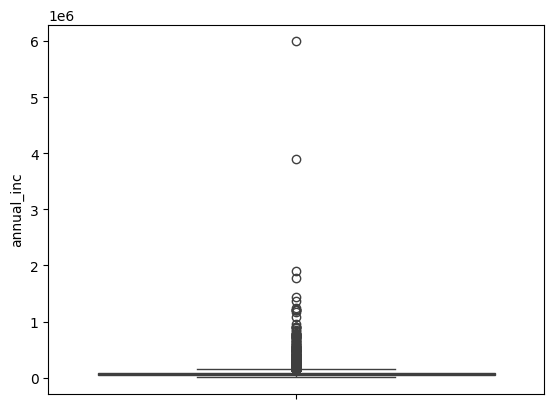

In [35]:
sns.boxplot(data['annual_inc'])

The plot above clearly indicates the presence of outliers in the data. To address this issue, we will proceed with the removal of these outliers. We have set the threshold for identifying and removing outliers at the 95th percentile.

In [36]:
per_95_annual_inc = data['annual_inc'].quantile(0.95)
data = data[data.annual_inc <= per_95_annual_inc]

<Axes: ylabel='annual_inc'>

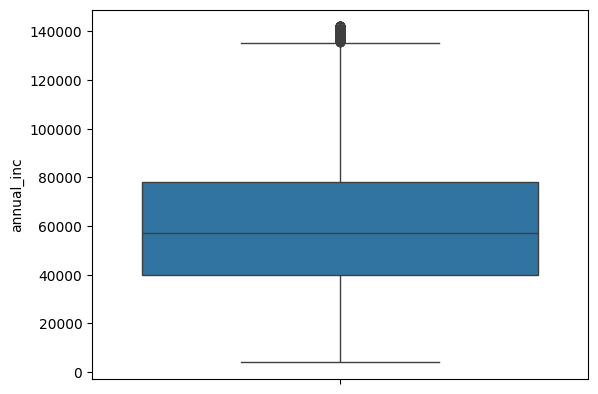

In [37]:
sns.boxplot(data.annual_inc)

The box plot for the "annual_inc" data appears to be within acceptable ranges. Now, let's turn our attention to the analysis of other numerical variables that may potentially exhibit outliers. These variables include:

dti (Debt-to-Income Ratio)
loan_amnt (Loan Amount)
We will examine these variables for the presence of outliers to ensure the robustness of our analysis.

<Axes: ylabel='dti'>

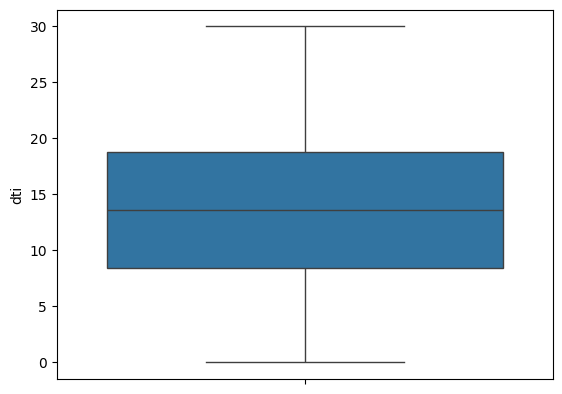

In [38]:
sns.boxplot(data.dti)

<Axes: ylabel='loan_amnt'>

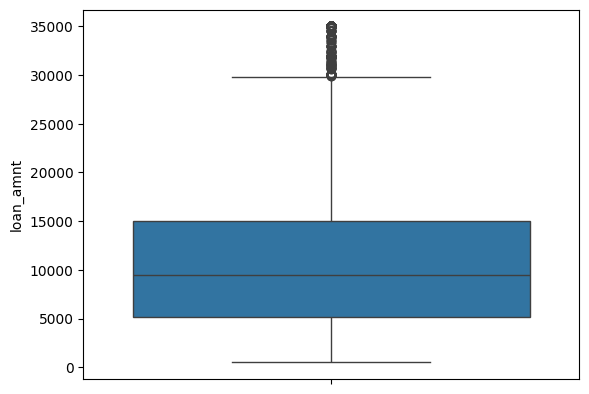

In [39]:
sns.boxplot(data.loan_amnt)

In [40]:
data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.75   15000.00
0.90   20000.00
0.95   25000.00
0.97   26000.00
0.97   28000.00
0.98   30000.00
0.99   35000.00
1.00   35000.00
Name: loan_amnt, dtype: float64


While it's true that there are some values that are quite distant from the central distribution in these columns, it's important to note that the overall distribution appears to be relatively continuous. Therefore, there is no immediate necessity to remove outliers or extreme values from these columns.

# Univariate Analysis

### EDA for Loan Amount
The "loan amount" refers to the specific sum of money that a borrower requests and is approved to borrow from a lender.

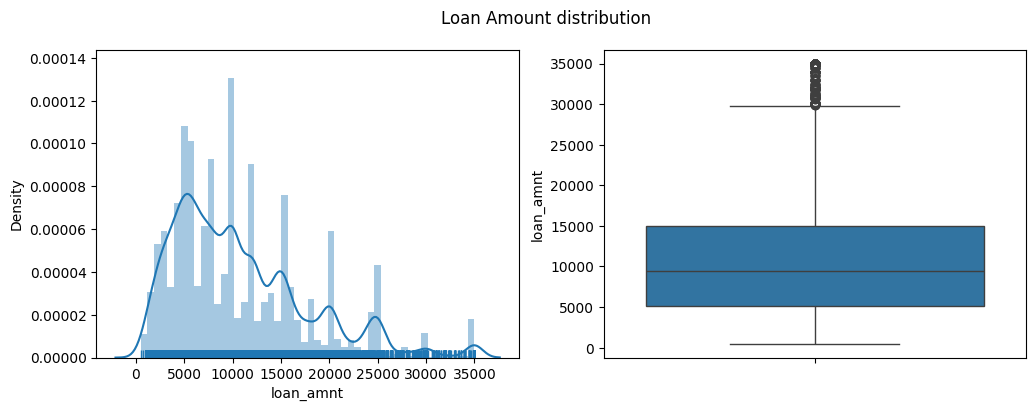

In [41]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=data.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=data.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

In [42]:
#Stats of loan amount
data.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   34972.00
mean    10778.63
std      7067.55
min       500.00
5%       2400.00
10%      3150.00
25%      5125.00
50%      9500.00
75%     15000.00
90%     20000.00
95%     25000.00
99%     35000.00
max     35000.00
Name: loan_amnt, dtype: float64

**Observations**:

Based on the observations drawn from the plots, it is evident that a larger number of individuals opted for a loan amount of 10,000
which aligns with the median value of the distribution. In contrast, a relatively small proportion of applicants chose loan amounts exceeding 30,000

### EDA for Funded Amount
The "funded amount" represents the total sum of money committed to a particular loan at a given point in time.

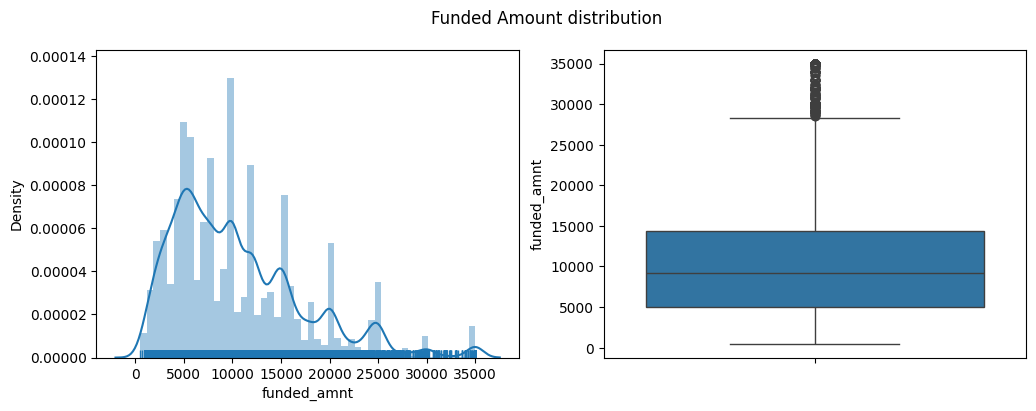

In [43]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

In [44]:
data.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   34972.00
mean    10526.72
std      6817.15
min       500.00
5%       2400.00
10%      3100.00
25%      5000.00
50%      9150.00
75%     14400.00
90%     20000.00
95%     25000.00
99%     34711.25
max     35000.00
Name: funded_amnt, dtype: float64

## EDA for Categorical Data
Since we already possess a "grade" column, we will extract and focus exclusively on the subgrade information (represented as integer values) from the "sub_grade" variable. In our analysis and visualization, we are specifically concentrating on the dataset related to loan defaulters. Therefore, we will subset the data and limit our plots to only include records with a "Charged Off" loan_status.


<Axes: xlabel='loan_status', ylabel='count'>

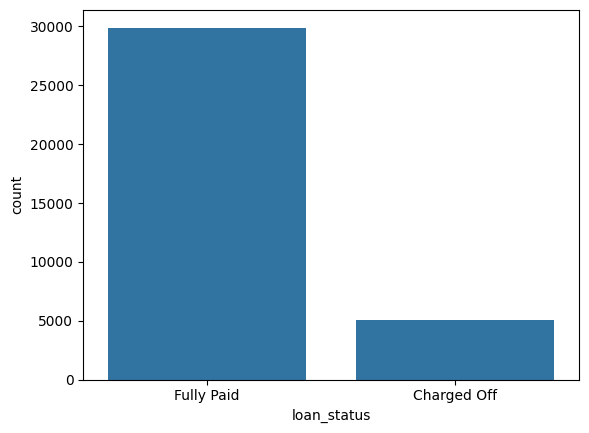

In [45]:
sns.countplot(x = 'loan_status', data = data)

In [46]:
data.sub_grade = pd.to_numeric(data.sub_grade.apply(lambda x : x[-1]))
data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

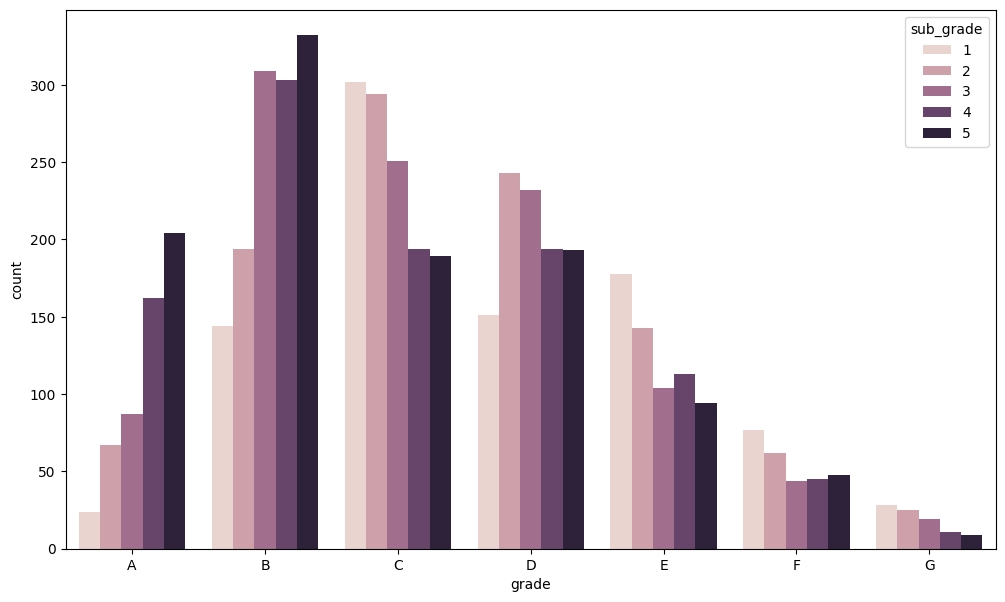

In [47]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('deep')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = data[data.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

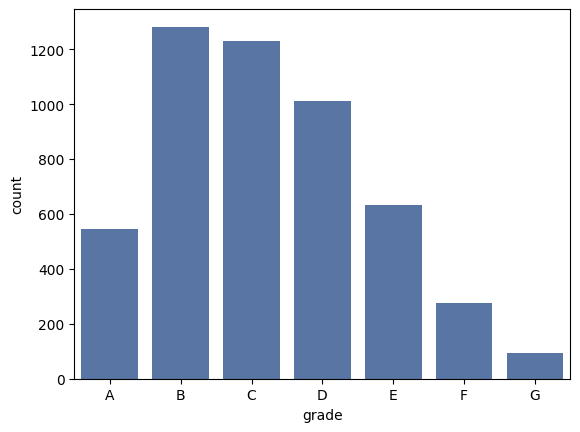

In [48]:
sns.countplot(x = 'grade', data = data[data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

-Loans graded as 'B' have an increased probability of default.

-Specifically, loans assigned a total grade of 'B5' have a higher likelihood of defaulting.

## EDA for Home ownership

In [49]:
#checking unique values for home_ownership
data['home_ownership'].unique()


array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)


There are only three records in the dataset with a value of 'NONE.' To address this, we will replace these occurrences with 'OTHER' for consistency.

In [50]:
#replacing 'NONE' with 'OTHERS'
data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [51]:
value_counts = data['home_ownership'].value_counts()
value_counts

RENT        17236
MORTGAGE    15059
OWN          2586
OTHER          91
Name: home_ownership, dtype: int64

In [52]:
charged_off_data = data[data['loan_status'] == 'Charged Off']
value_counts = charged_off_data['home_ownership'].value_counts()

print("Value Counts for 'home_ownership' in 'Charged Off' Loans:")
print(value_counts)

Value Counts for 'home_ownership' in 'Charged Off' Loans:
RENT        2602
MORTGAGE    2072
OWN          378
OTHER         17
Name: home_ownership, dtype: int64


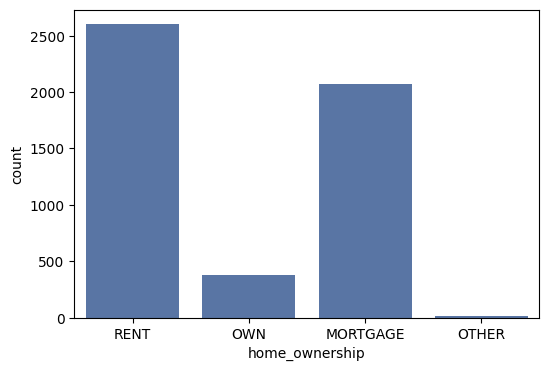

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(x='home_ownership', data=data[data['loan_status']=='Charged Off'])
plt.show()


Observation : Applicants with 'RENT' as their house ownership status have a higher probability of defaulting.

## EDA for Purpose

Count of 'purpose' for 'Charged Off' loans:
debt_consolidation    2537
other                  550
credit_card            480
small_business         425
home_improvement       295
major_purchase         201
car                    150
medical                 97
wedding                 87
moving                  79
house                   54
vacation                49
educational             48
renewable_energy        17
Name: purpose, dtype: int64


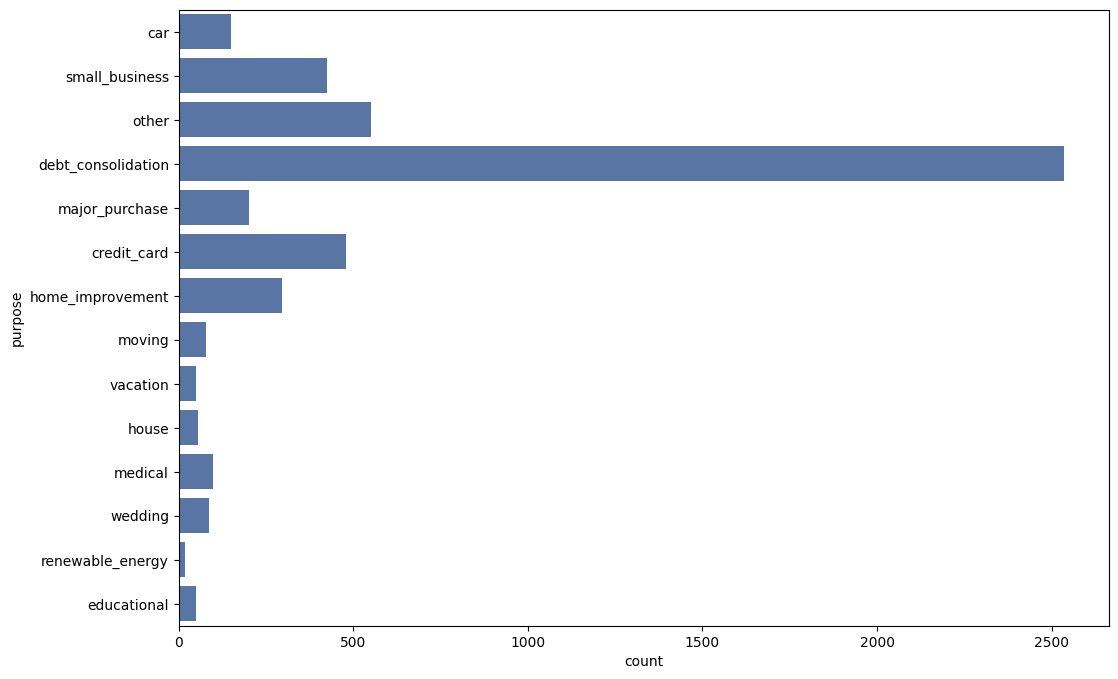

In [54]:
charged_off_data = data[data['loan_status'] == 'Charged Off']
purpose_counts = charged_off_data['purpose'].value_counts()

print("Count of 'purpose' for 'Charged Off' loans:")
print(purpose_counts)



plt.figure(figsize=(12, 8))
sns.countplot(y='purpose', data=data[data['loan_status'] == 'Charged Off'])
plt.show()

Observation

-Applicants with 'RENT' as their house ownership status have a higher probability of defaulting.

-Borrowers who use the loan for debt consolidation purposes are more likely to default.

#### Creating category bins for numerical variable to make them categorical

In [55]:
#creating bins for int_rate,open_acc,revol_util,total_acc
data['int_rate_groups'] = pd.cut(data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
data['open_acc_groups'] = pd.cut(data['open_acc'],bins = 5,precision =0,labels=['1-10','10-20','20-30','30-40','40-50'])
data['revol_util_groups'] = pd.cut(data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
data['total_acc_groups'] = pd.cut(data['total_acc'], bins=5,precision =0,labels=['1-20','21-40','41-60','61-80','81-100'])
data['annual_inc_groups'] = pd.cut(data['annual_inc'], bins=5,precision =0,labels =['0k-30k','30k-60k','60k-90k','90k-120k','120k-150k'])

In [56]:
# Viewing new bins that are created
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,5000,4975.00,36 months,10.65,162.87,B,2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,27.65,1985-01-01,1,3,0,83.70,9,5833.84,0.00,2011,Dec,3,1985,Jan,9%-13%,1-10,80-100,1-20,0k-30k
1,2500,2500,2500.00,60 months,15.27,59.83,C,4,0,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,1.00,1999-04-01,5,3,0,9.40,4,1008.71,0.00,2011,Dec,3,1999,Apr,13%-17%,1-10,0-20,1-20,0k-30k
2,2400,2400,2400.00,36 months,15.96,84.33,C,5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,8.72,2001-11-01,2,2,0,98.50,10,3005.67,0.00,2011,Dec,3,2001,Nov,13%-17%,1-10,80-100,1-20,0k-30k
3,10000,10000,10000.00,36 months,13.49,339.31,C,1,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,20.00,1996-02-01,1,10,0,21.00,37,12231.89,0.00,2011,Dec,3,1996,Feb,13%-17%,1-10,20-40,21-40,30k-60k
5,5000,5000,5000.00,36 months,7.90,156.46,A,4,3,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,11.20,2004-11-01,3,9,0,28.30,12,5632.21,0.00,2011,Dec,3,2004,Nov,5%-9%,1-10,20-40,1-20,30k-60k


## EDA for Interest rate wrt the interest rate categories created

<Axes: xlabel='emp_length', ylabel='count'>

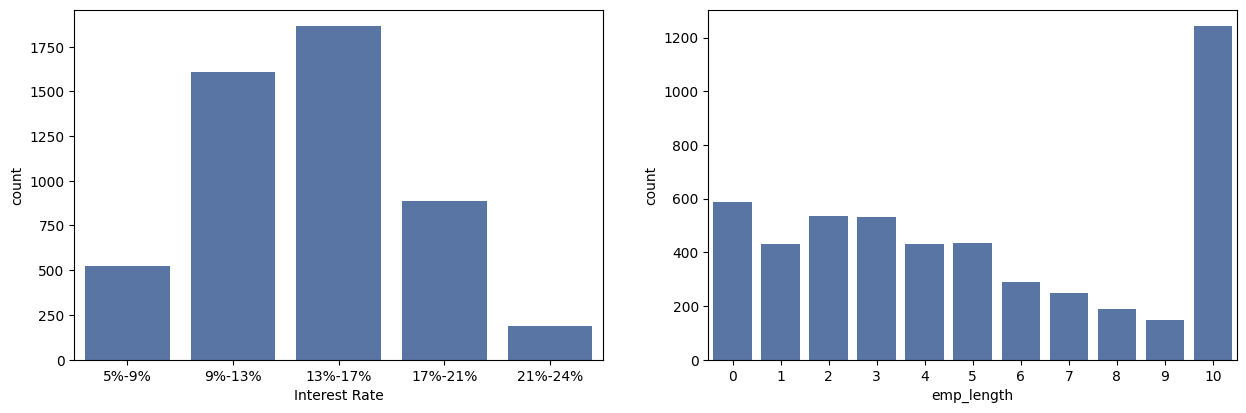

In [57]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=data[data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=data[data.loan_status == 'Charged Off'])

Observation
-Default probability is elevated when the interest rate falls within the range of 13-17%.

## EDA for Open_acc , Revol_util, Total_acc and Annual_inc

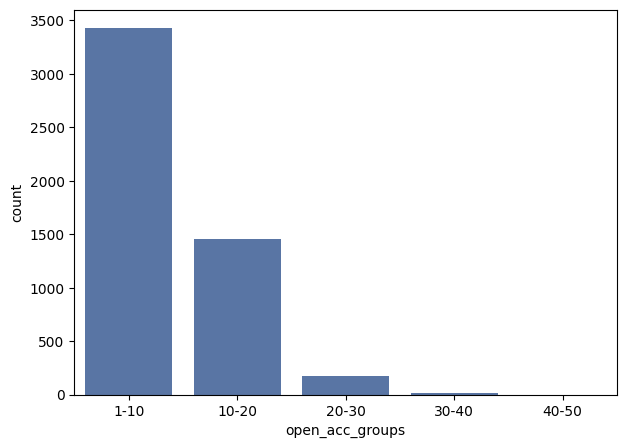

In [58]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.set_yscale('linear')
sns.countplot(x='open_acc_groups', data=data[data['loan_status'] == 'Charged Off'])
plt.show()

<Axes: xlabel='revol_util_groups', ylabel='count'>

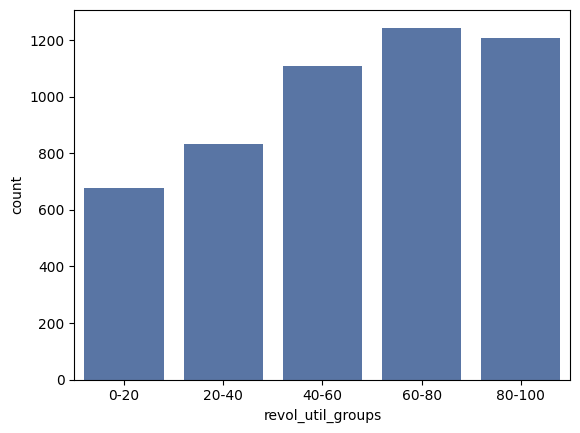

In [59]:
sns.countplot(x='revol_util_groups', data=data[data.loan_status == 'Charged Off'])

<Axes: xlabel='total_acc_groups', ylabel='count'>

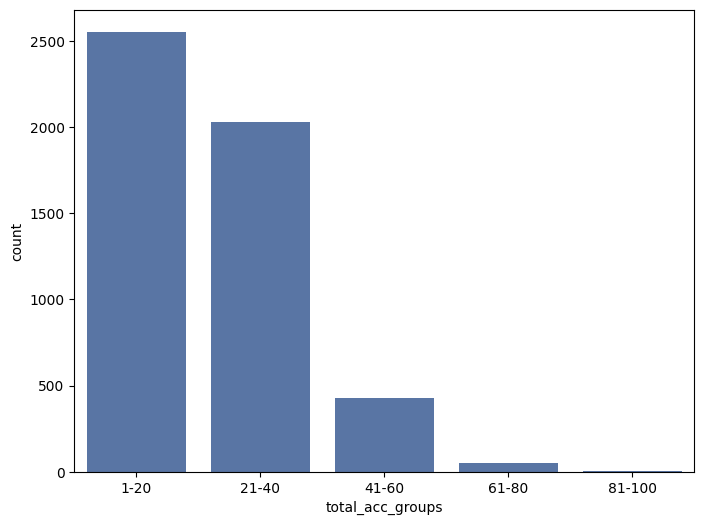

In [60]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('linear')
sns.countplot(x='total_acc_groups', data=data[data.loan_status == 'Charged Off'])

<Axes: xlabel='annual_inc_groups', ylabel='count'>

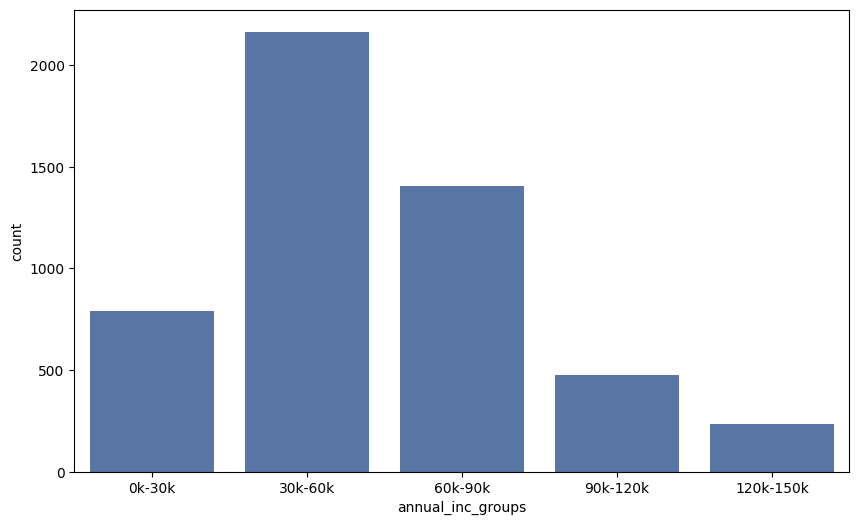

In [61]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=data[data.loan_status == 'Charged Off'])

Observation
-Borrowers with an annual income ranging from 30000 to 60000 are more prone to default.

<Axes: xlabel='count', ylabel='term'>

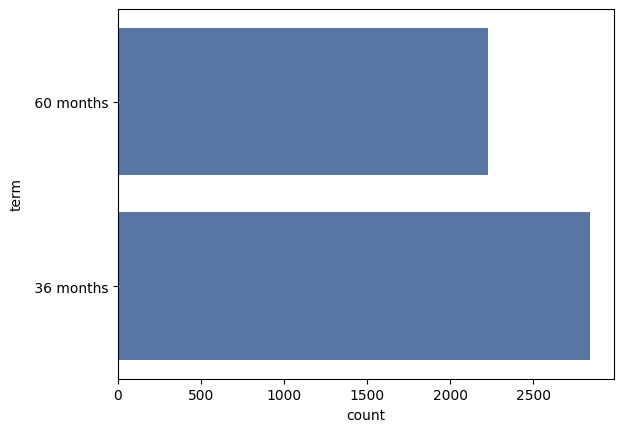

In [62]:
sns.countplot(y='term', data=data[data['loan_status']=='Charged Off'])

<Axes: xlabel='verification_status', ylabel='count'>

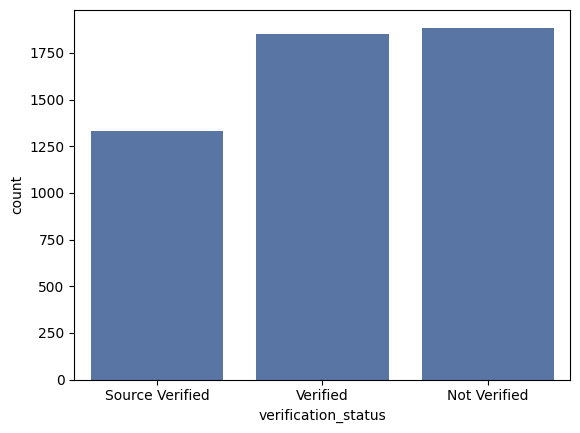

In [63]:
sns.countplot(x='verification_status', data=data[data['loan_status']=='Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

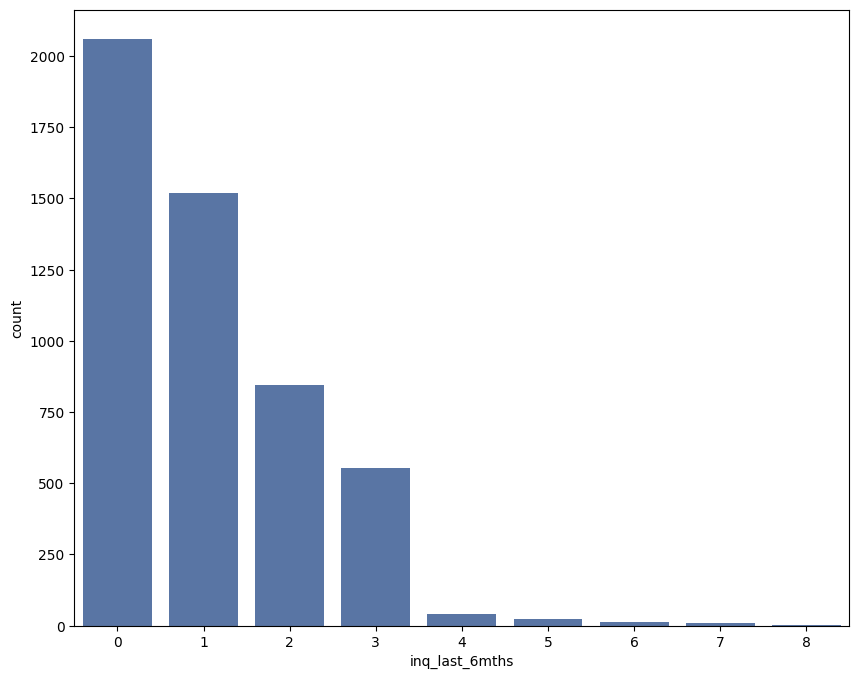

In [64]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('linear')
sns.countplot(x='inq_last_6mths', data=data[data['loan_status']=='Charged Off'])

<Axes: xlabel='pub_rec', ylabel='count'>

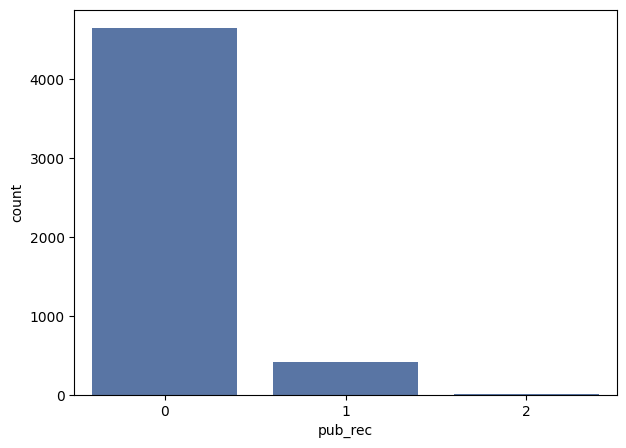

In [65]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('linear')
sns.countplot(x='pub_rec', data=data[data['loan_status']=='Charged Off'])

## EDA for Installment
The monthly payment owed by the borrower if the loan originates.

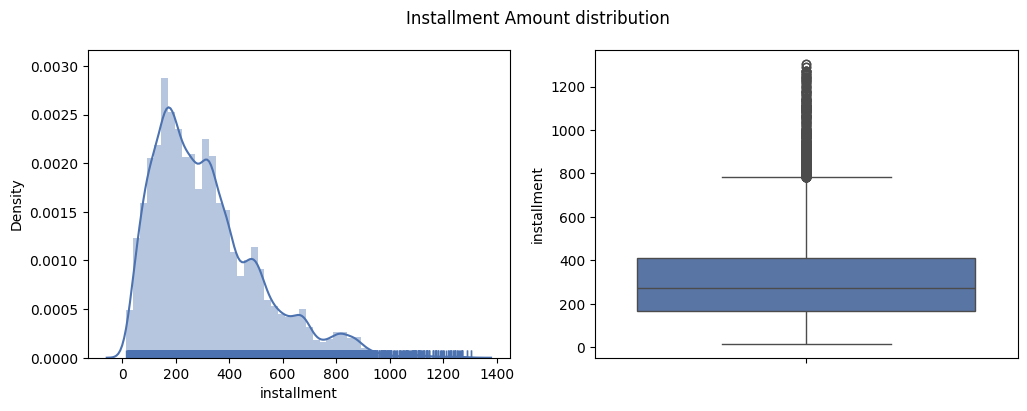

In [66]:
installment = data.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=installment)
plt.suptitle('Installment Amount distribution')
plt.show()

**Observations**:<br>
The most representative value of the installment amount appears to be around $280. This indicates that a significant number of borrowers have installment amounts close to this value in the dataset.

## EDA by Issued Month and Year


In [67]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,total_pymnt_inv,pub_rec_bankruptcies,issue_d_year,issue_d_month,issue_d_weekday,earliest_cr_line_year,earliest_cr_line_month,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,5000,5000,4975.00,36 months,10.65,162.87,B,2,10,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,27.65,1985-01-01,1,3,0,83.70,9,5833.84,0.00,2011,Dec,3,1985,Jan,9%-13%,1-10,80-100,1-20,0k-30k
1,2500,2500,2500.00,60 months,15.27,59.83,C,4,0,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,1.00,1999-04-01,5,3,0,9.40,4,1008.71,0.00,2011,Dec,3,1999,Apr,13%-17%,1-10,0-20,1-20,0k-30k
2,2400,2400,2400.00,36 months,15.96,84.33,C,5,10,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,8.72,2001-11-01,2,2,0,98.50,10,3005.67,0.00,2011,Dec,3,2001,Nov,13%-17%,1-10,80-100,1-20,0k-30k
3,10000,10000,10000.00,36 months,13.49,339.31,C,1,10,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,20.00,1996-02-01,1,10,0,21.00,37,12231.89,0.00,2011,Dec,3,1996,Feb,13%-17%,1-10,20-40,21-40,30k-60k
5,5000,5000,5000.00,36 months,7.90,156.46,A,4,3,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,11.20,2004-11-01,3,9,0,28.30,12,5632.21,0.00,2011,Dec,3,2004,Nov,5%-9%,1-10,20-40,1-20,30k-60k


<Axes: xlabel='issue_d_year', ylabel='count'>

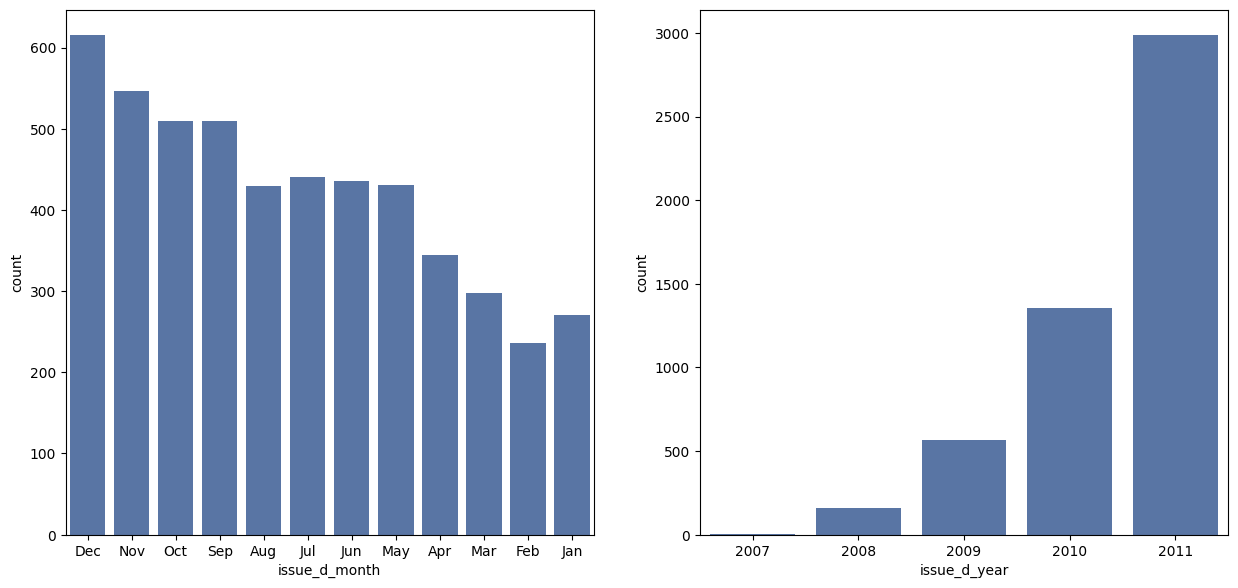

In [68]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_d_month', data=data[data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_d_year', data=data[data['loan_status']=='Charged Off'])

The highest number of loan defaults occurred when the loans were sanctioned or issued in December. Furthermore, in the year 2011, there was a notable increase in the number of loans issued compared to other years.



## EDA for variables related to installment, debt-to-income ratio (dti), and loan amount (loan_amnt).


In [69]:
data['installment_groups'] = pd.cut(data['installment'], bins=9,precision =0,labels=['10-150','150-300','300-450','450-600','600-750','750-900','900-1150','1150-1300','1300-1450'])
data['funded_amnt_inv_group'] = pd.cut(data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
data['loan_amnt_groups'] = pd.cut(data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
data['dti_groups'] = pd.cut(data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

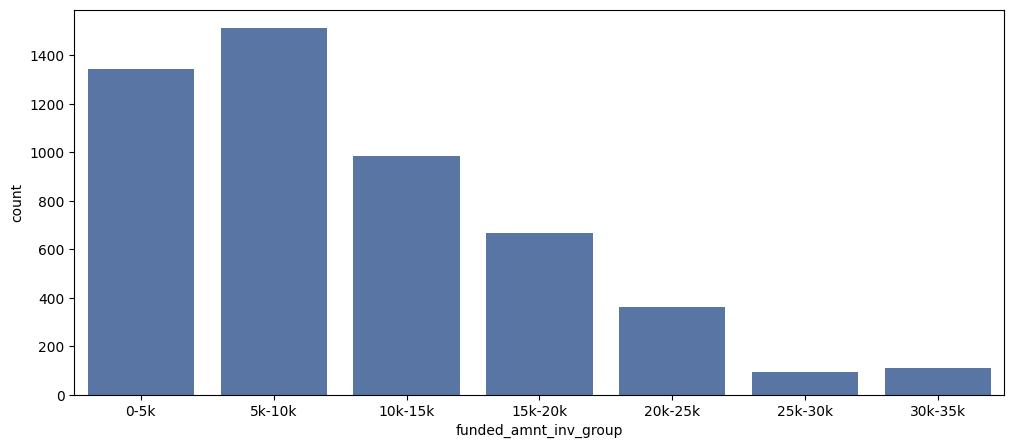

In [70]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('linear')
sns.countplot(x='funded_amnt_inv_group', data=data[data['loan_status']=='Charged Off'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

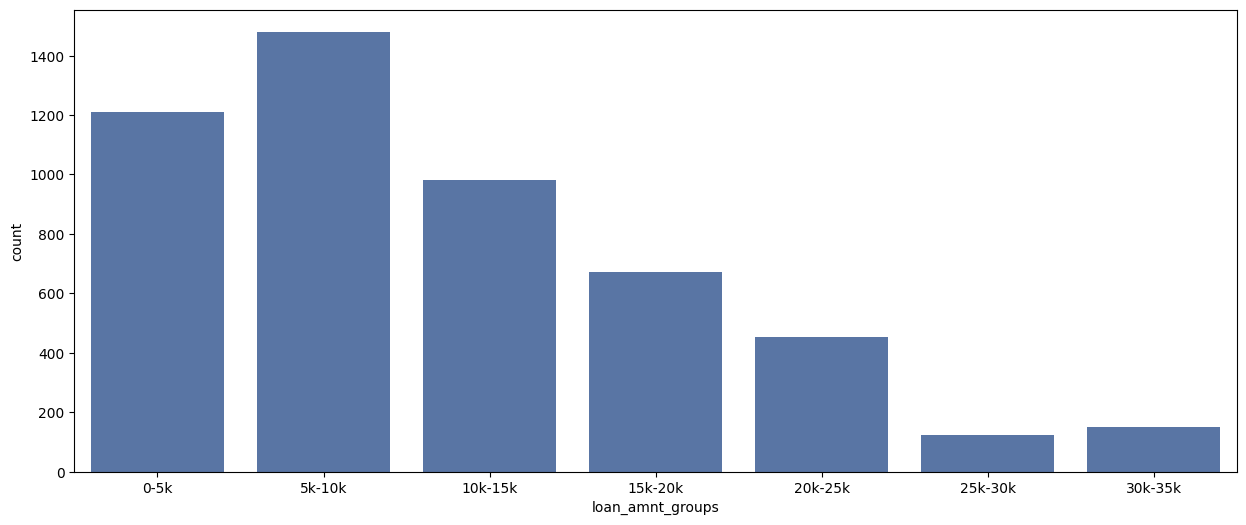

In [71]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('linear')
sns.countplot(x='loan_amnt_groups', data=data[data['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

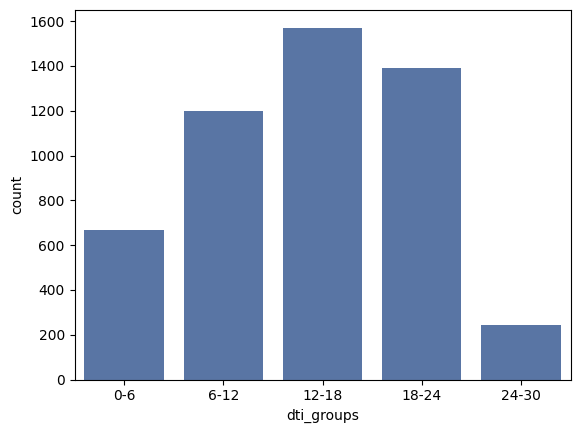

In [72]:
sns.countplot(x='dti_groups', data=data[data['loan_status']=='Charged Off'])

Based on the analysis above we can say

-Loan amounts falling between 5000 and 10000 are linked to an elevated likelihood of default.

-A debt-to-income ratio (dti) in the range of 12-18 increases the probability of default.

<Axes: xlabel='installment_groups', ylabel='count'>

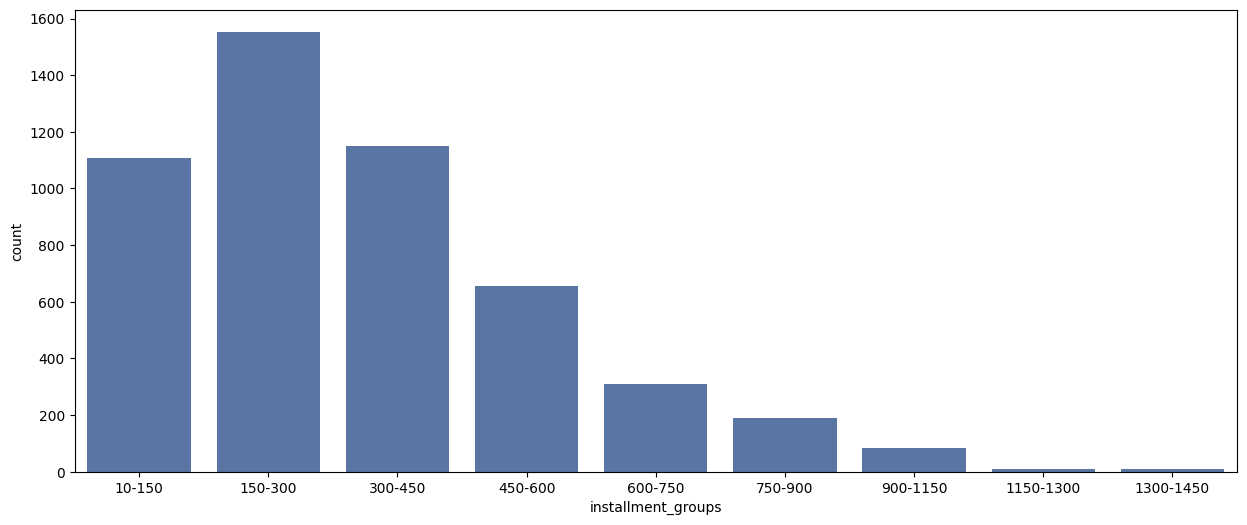

In [73]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('linear')
sns.countplot(x='installment_groups', data=data[data['loan_status']=='Charged Off'])

# Observations from Univariate EDA & Recommendation

### Based on the analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when :

-Applicants with 'RENT' as their house ownership status have a higher probability of defaulting.

-Borrowers who use the loan for debt consolidation purposes are more likely to default.

[-Default probability is elevated when the interest rate falls within the range of 13-17%.

-Borrowers with an annual income ranging from USD 30000 to USD 60000 are more prone to default.]

-Individuals with 20-37 open accounts (open_acc) exhibit a higher likelihood of default.

-Borrowers with a employment length of 10 years have an increased chance of defaulting.

-Loans funded by investors within the range of $5,000 to $10,000 are associated with higher default rates.

-Loan amounts falling between $5000 and $10000 are linked to an elevated likelihood of default.

-A debt-to-income ratio (dti) in the range of 12-18 increases the probability of default.

-Loans with monthly installments between $150 and $300 are more likely to default.

-Loans with a term of 36 months have a higher probability of defaulting.

-Loans without verified status are associated with a greater likelihood of default.

-A borrower's default probability tends to be higher when they have zero recent inquiries in the last 6 months.

-Borrowers with zero derogatory public records are more prone to default.

-Loans intended for the purpose of debt consolidation exhibit a higher likelihood of default.

-Loans graded as 'B' have an increased probability of default.

-Specifically, loans assigned a total grade of 'B5' have a higher likelihood of defaulting.


Another intriguing observation stems from the date of issuance. It appears that loans issued in the later months of a year are associated with a higher probability of default. Additionally, the increased number of loan defaults in 2011 might be attributed to the financial crisis in the United States, assuming that the dataset originates from the U.S.

#Bivariate Analysis

#### EDA for Term vs Loan Status

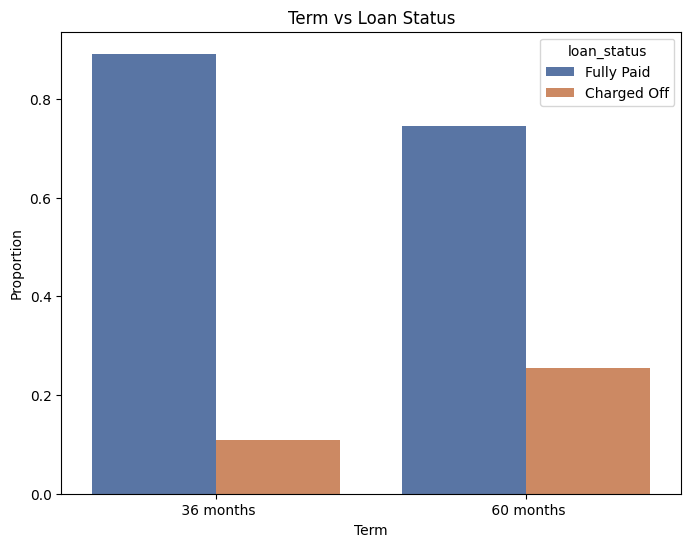

In [74]:
#Proportion of values for each category
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the counts of each category for 'term' and 'loan_status'
df = data.groupby(['term', 'loan_status']).size().reset_index(name='count')

# Calculate the proportion within each 'term' category
df['proportion'] = df.groupby('term')['count'].transform(lambda x: x / x.sum())

# Specify the desired order for the 'loan_status' categories
hue_order = ['Fully Paid', 'Charged Off']

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order=hue_order)

plt.title('Term vs Loan Status')
plt.xlabel('Term')
plt.ylabel('Proportion')
plt.show()


**Observations**:  
Looks like there  are more proportion of borrowers defaulted loan in 60 months term then 36 months. Also the Fully Paid rate is higher in 36 months tenure.

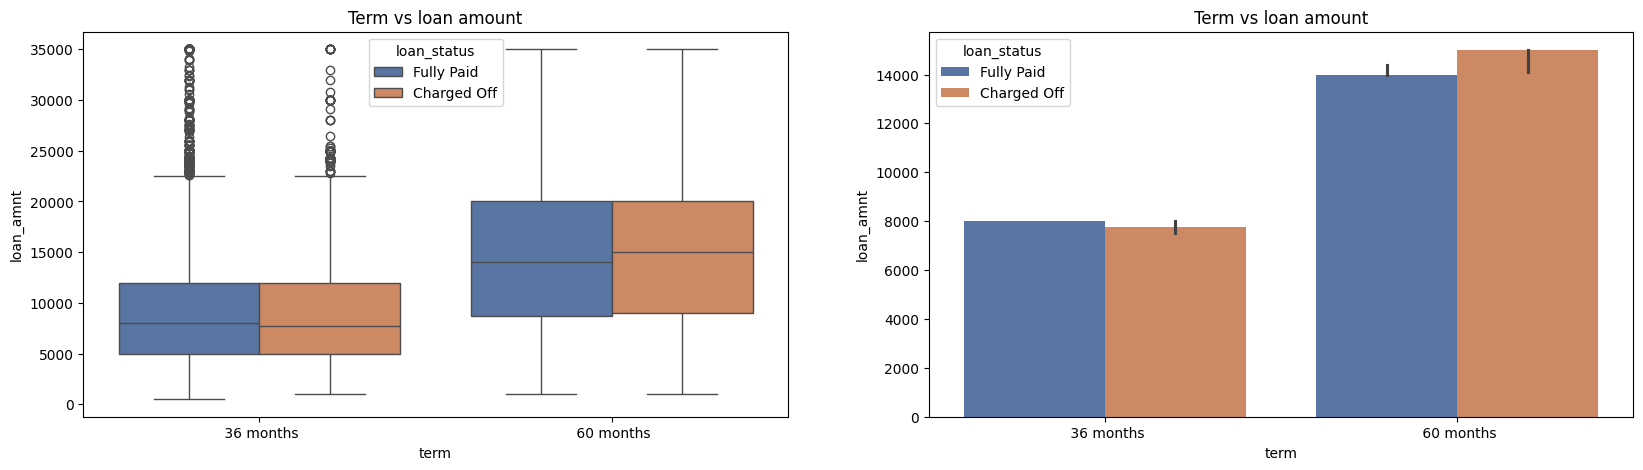

In [75]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=data)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

**Observations**:  
The loan amount does not appear to be a determining factor for defaults in both the 36 and 60-month loan terms. Borrowers exhibit a relatively equal distribution between default and non-default categories for both 36 and 60-month loan tenures.

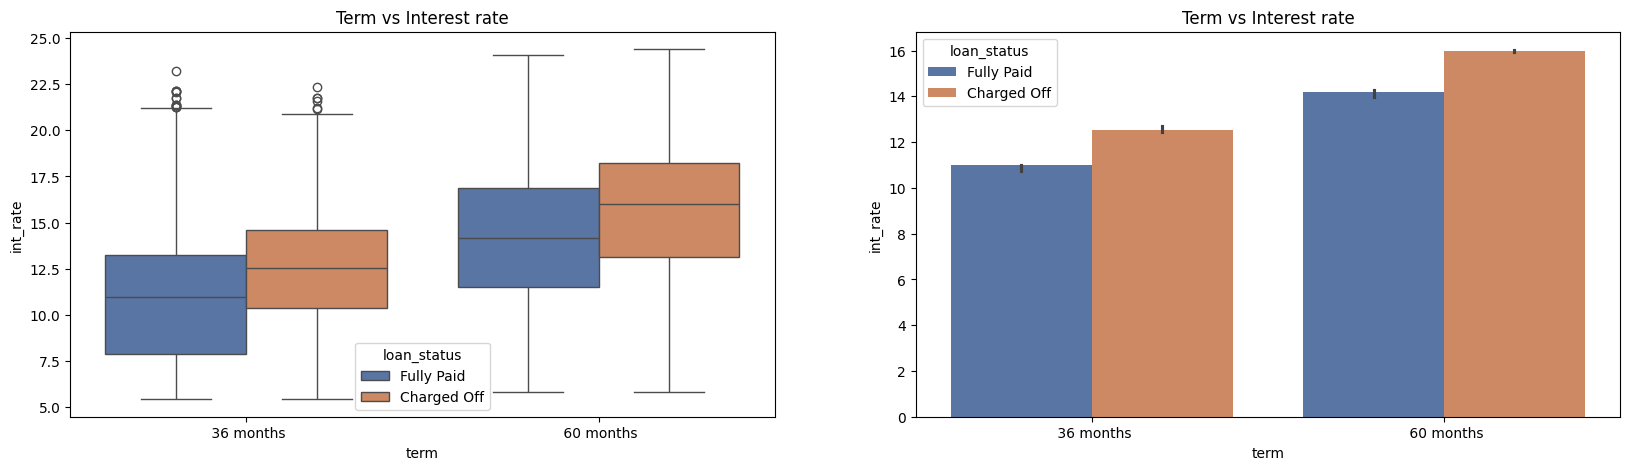

In [76]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=data)
plt.title('Term vs Interest rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()

**Observations**  
For higher interest rates the deafult rate is higher in both 36 and 60 months tenure.

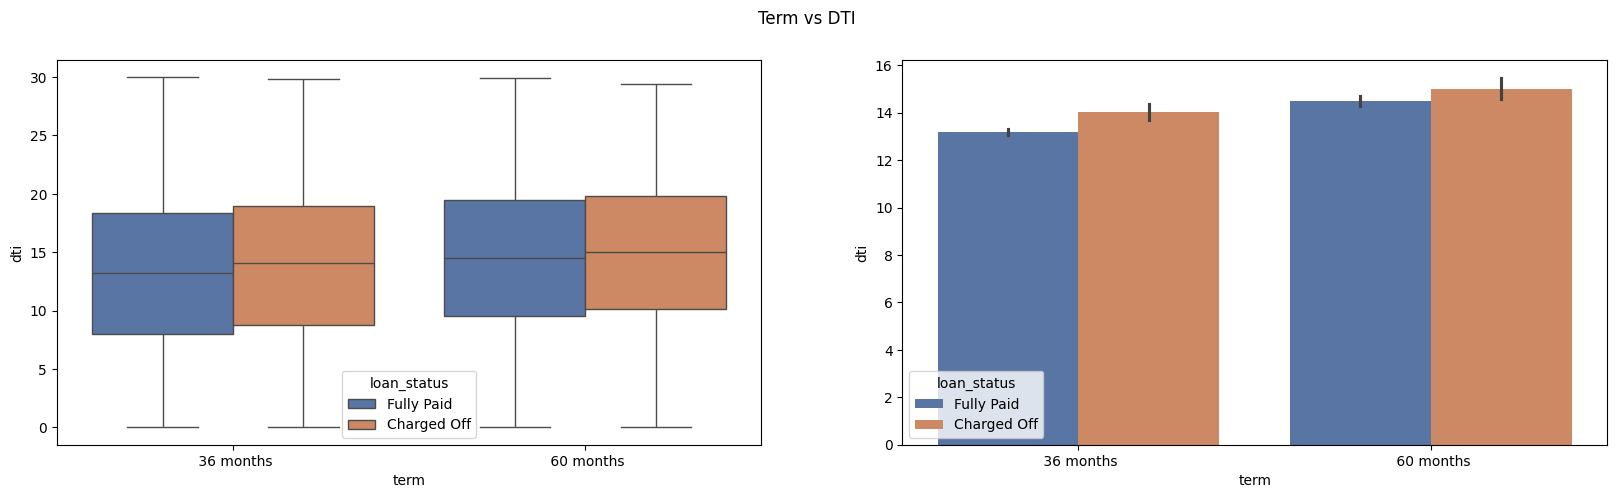

In [77]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

**Observations:**  
Comparitively charge-off are higher when compared with fully-paid for the Debit to income ratio.

#### EDA for Annual income vs loan purpose

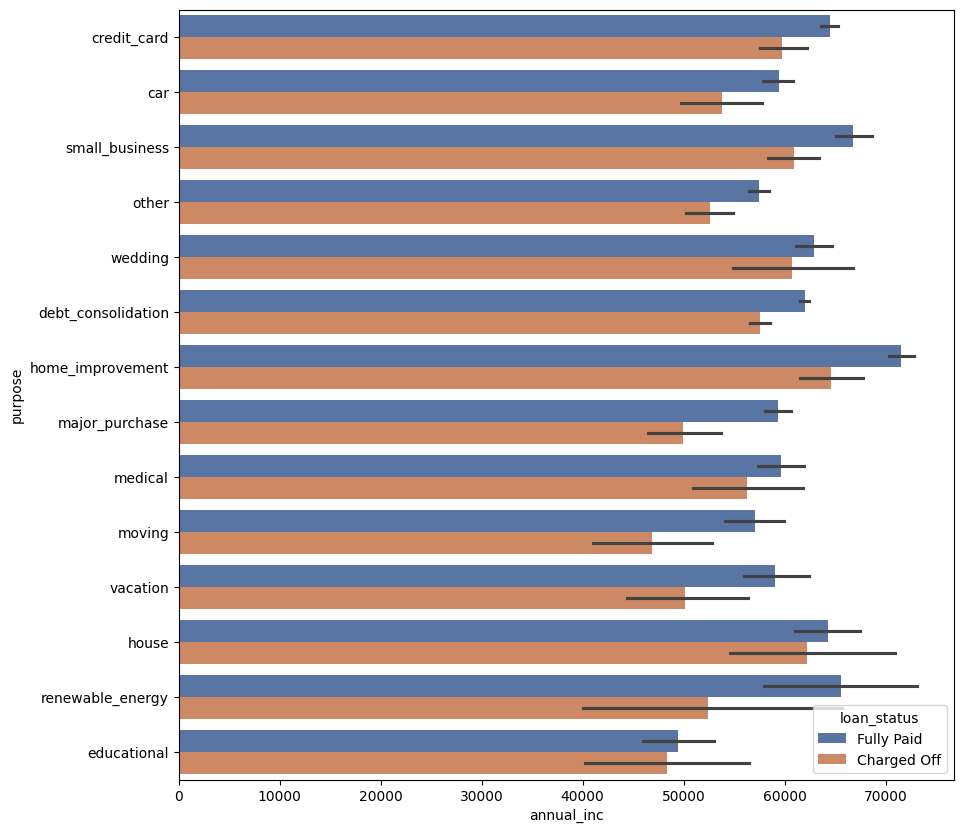

In [78]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

While the largest number of loan applications and defaults are associated with "debt consolidation," it's worth noting that the annual income of these applicants is not the highest. Borrowers with higher incomes tend to apply for loans primarily for purposes related to "home improvement," "house," "renewable energy," and "small businesses."

#### EDA for Annual income vs home ownership

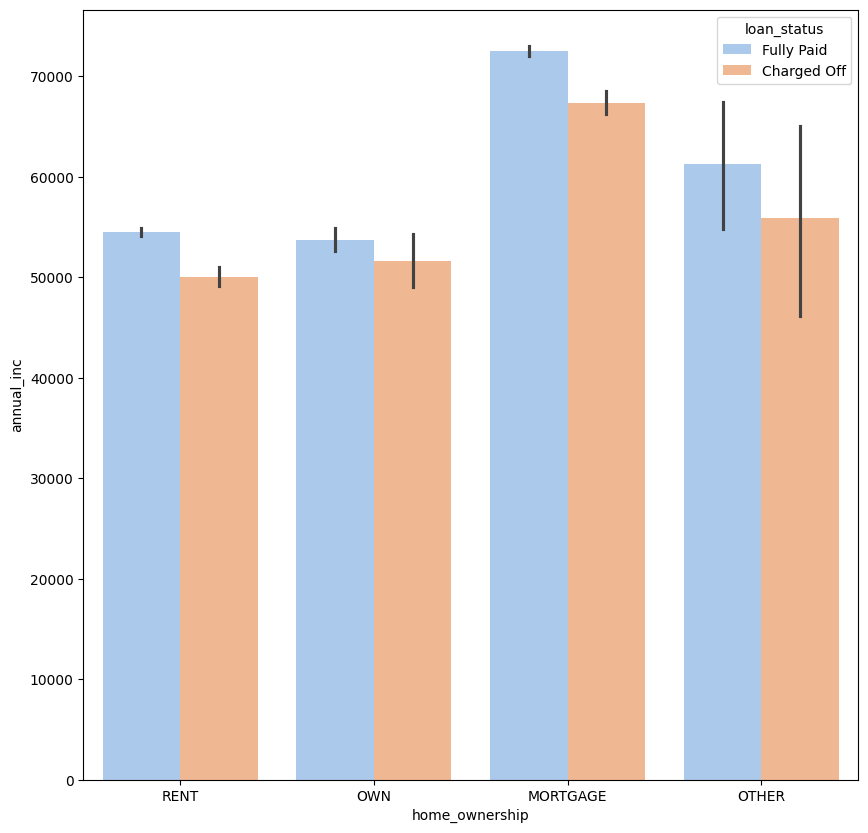

In [79]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

#### EDA for Annual Income vs Loan amount

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

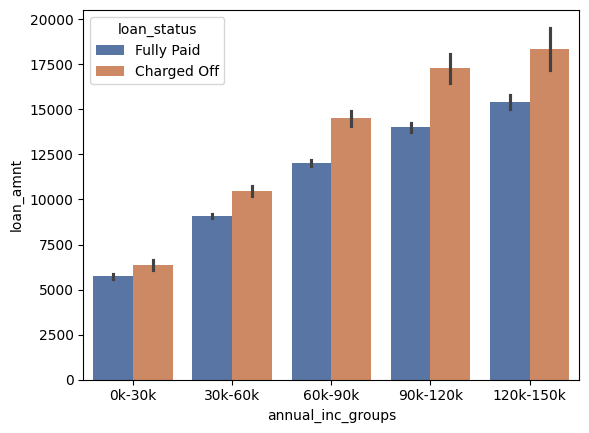

In [80]:
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = data)

Observation
Across all the income groups, the loan_amount is higher for people who defaulted.

#### EDA for Annual income vs int_rate

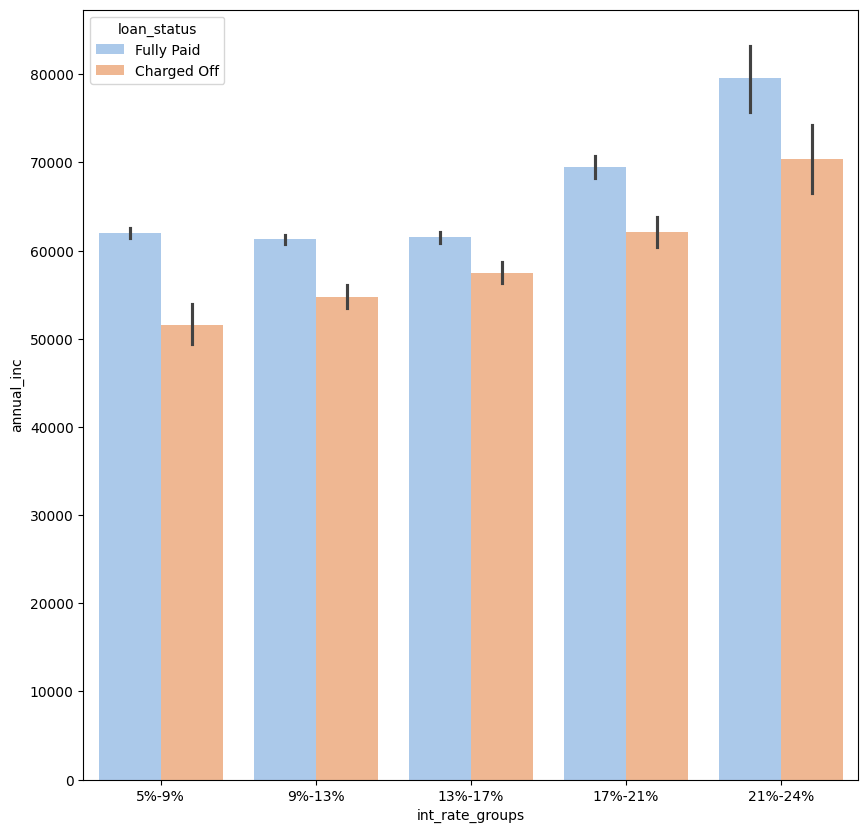

In [81]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

## EDA for Grade vs Loan amount

In [82]:
#Sorting Grades from A to G
grade_ord = data.grade.unique()
grade_ord.sort()

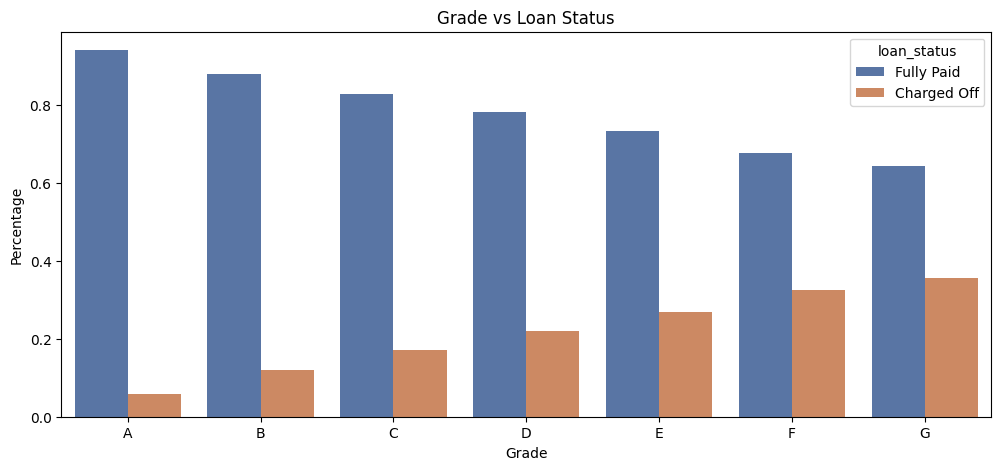

In [83]:
df = data.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')

**Observations:**  
The above graph clearly says the Charged off increases as grades decreases.

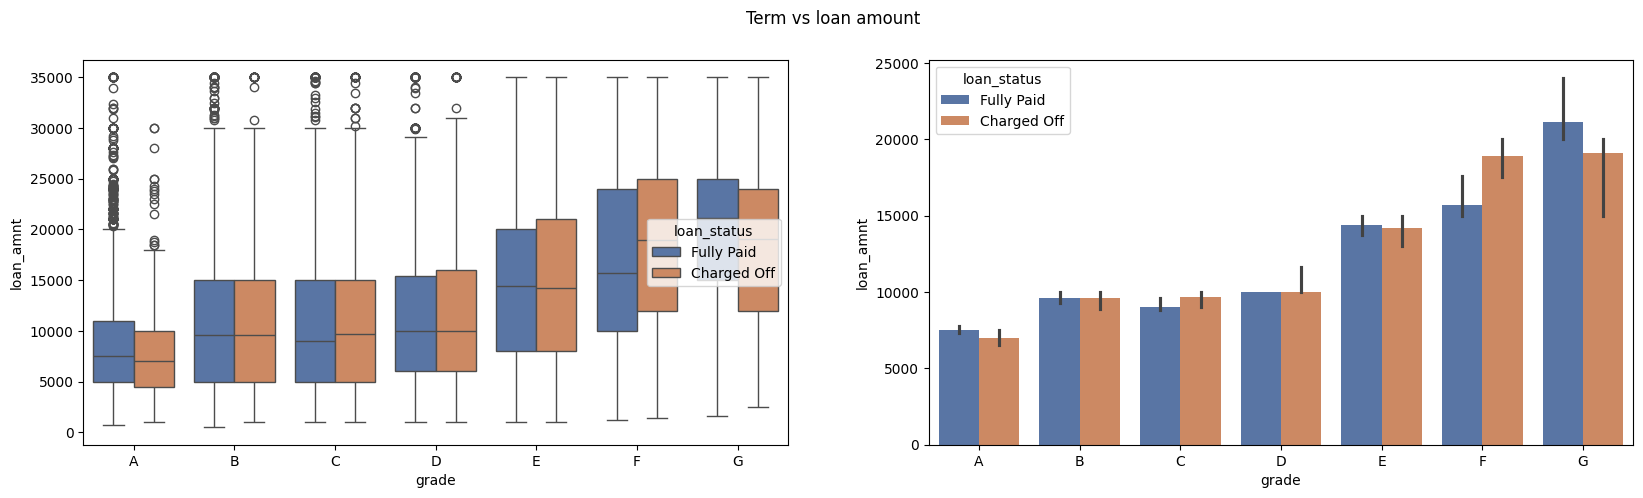

In [84]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=data, order = grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=data, estimator=np.median, order = grade_ord)
plt.suptitle('Term vs loan amount')
plt.show()

**Observations:**  
* For lower grades 'F' and 'G' there are more difference between charged-off and fully paid.  
* The lower grade people has taken higher amount of loans and also they are more prone to default the loan.

## EDA for Loan vs Loan purpose

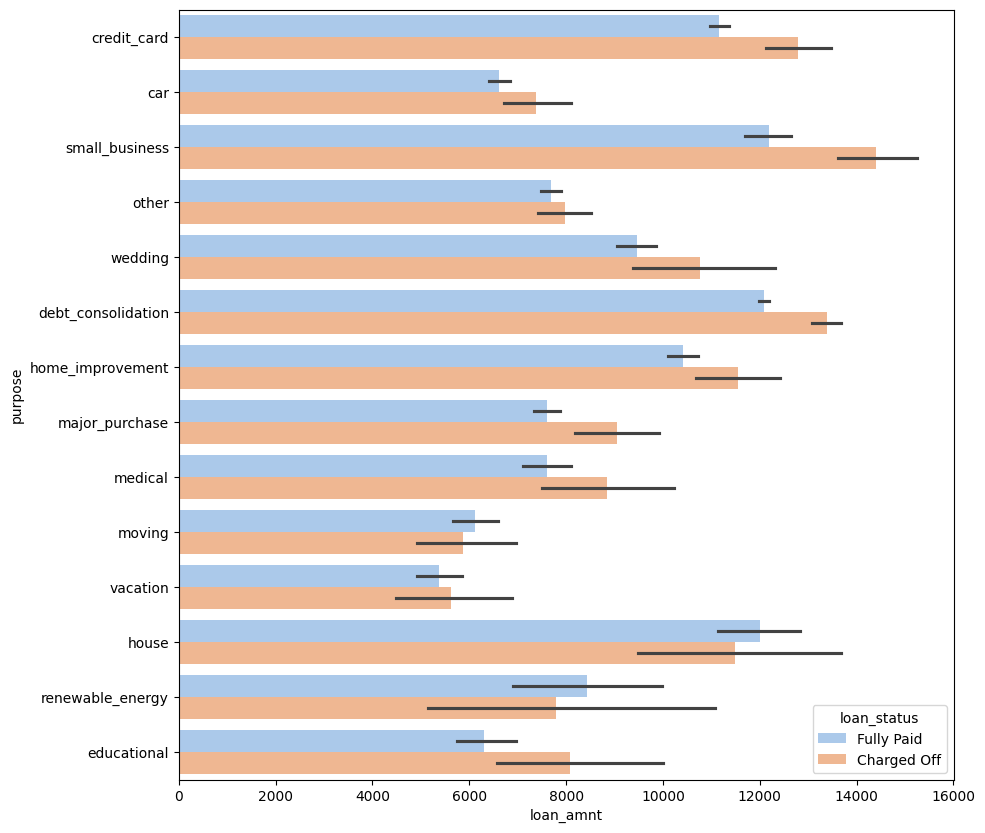

In [85]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

## EDA for Loan vs House Ownership

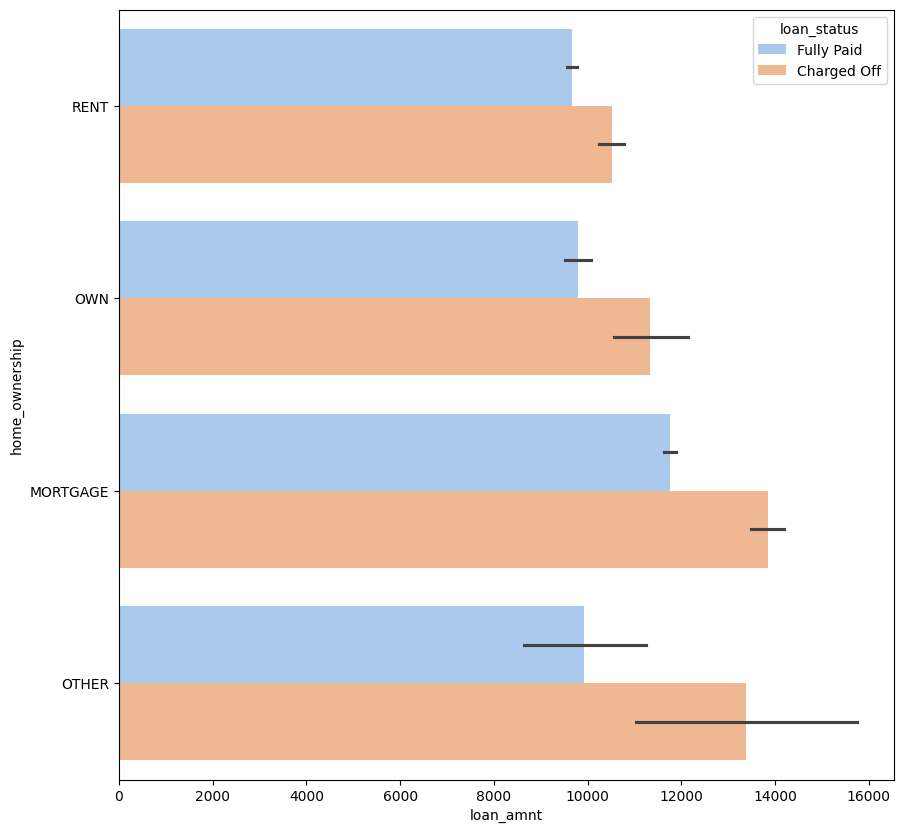

In [86]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

## EDA for Loan amount vs month issued and year issued

<Axes: xlabel='issue_d_year', ylabel='loan_amnt'>

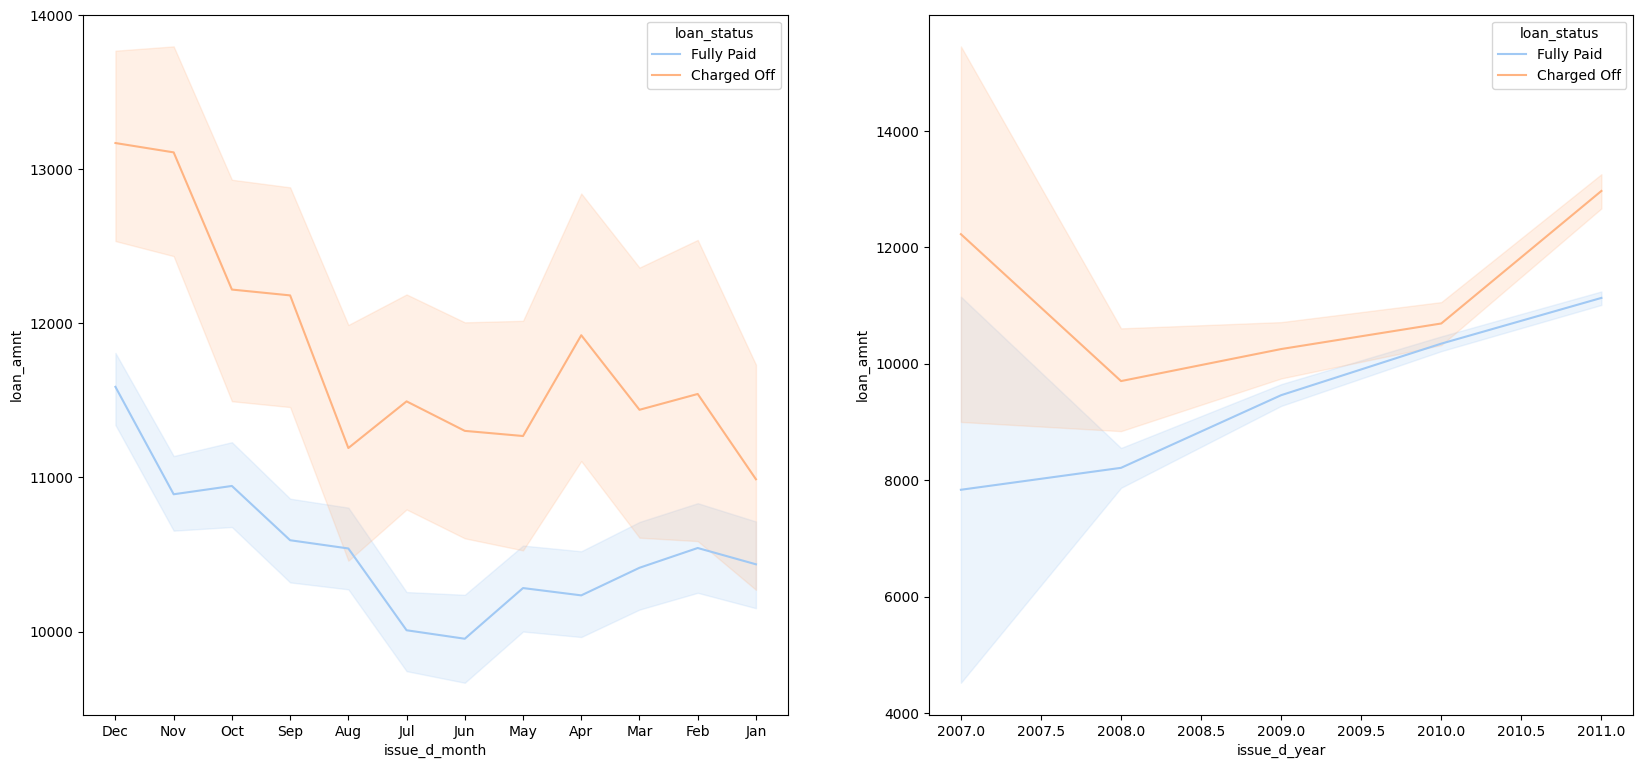

In [87]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =data,y='loan_amnt', x='issue_d_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =data,y='loan_amnt', x='issue_d_year', hue ='loan_status',palette="pastel")


## EDA for Loan amount amount vs Grade

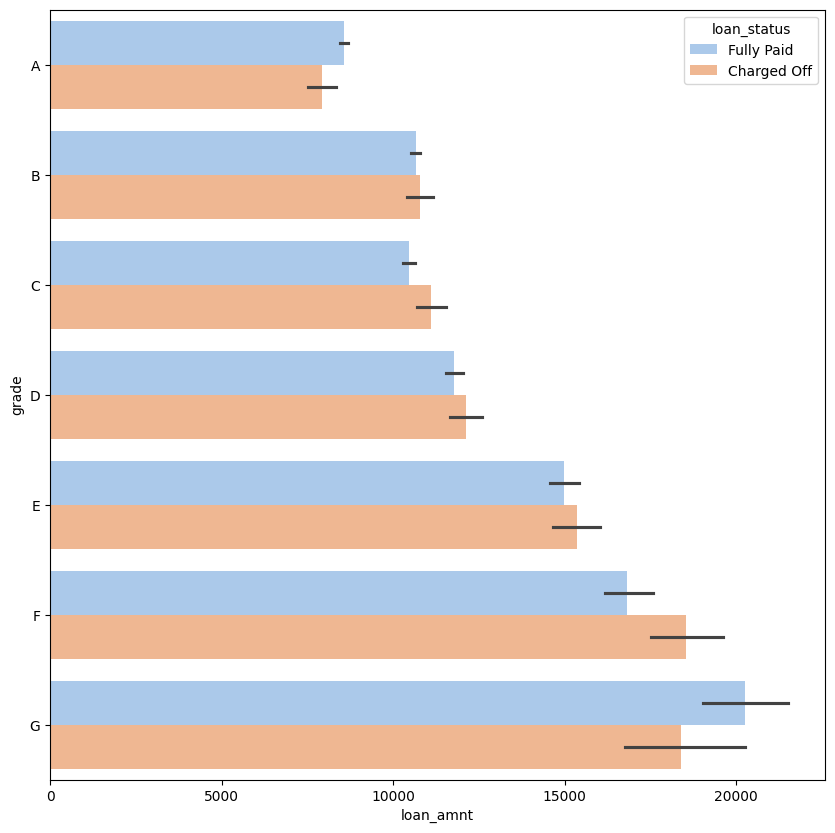

In [88]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Axes: xlabel='verification_status', ylabel='loan_amnt'>

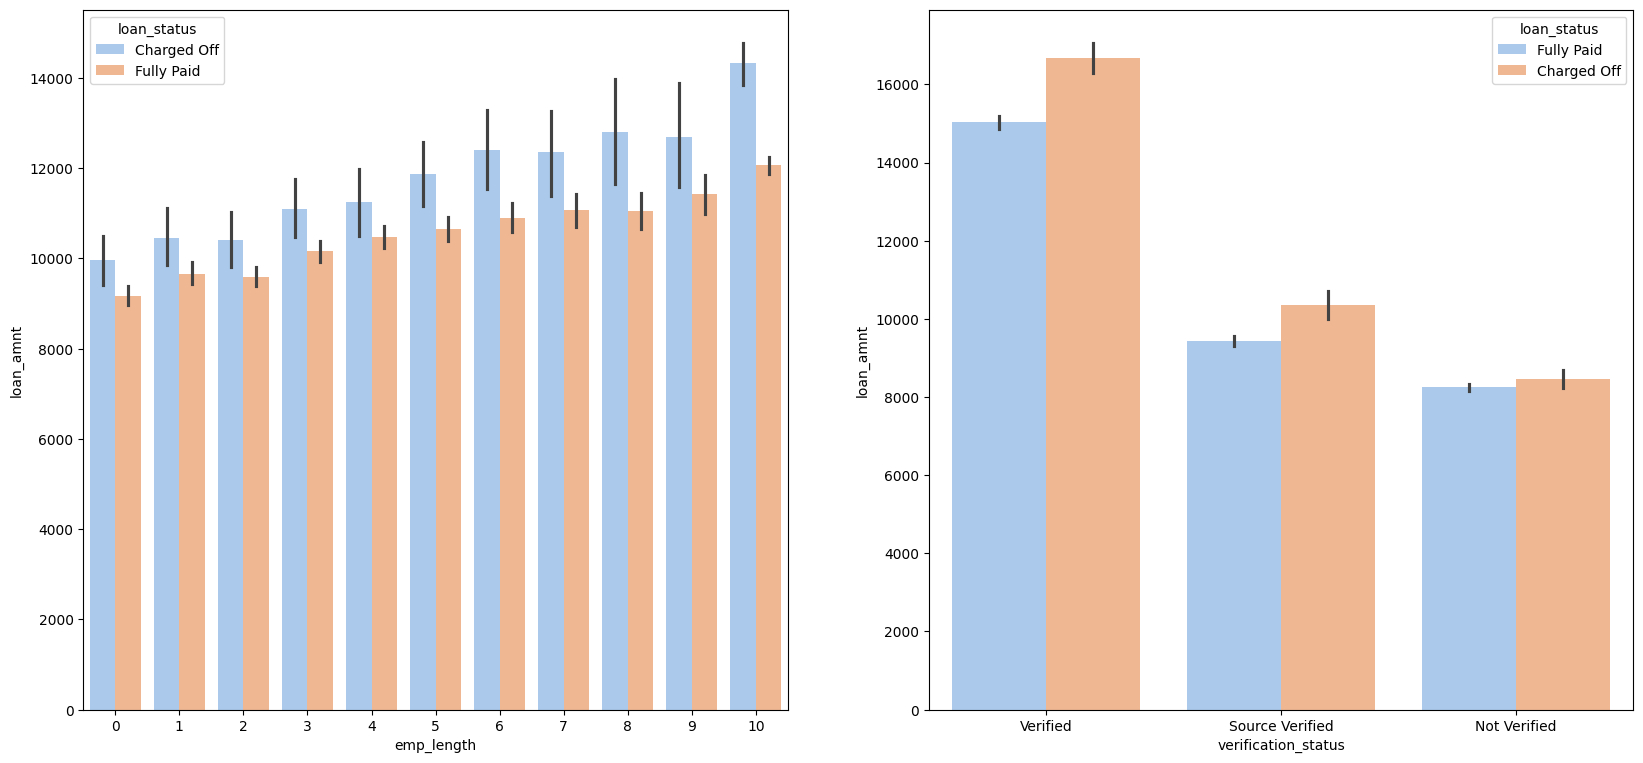

In [89]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")


Observation
Employees with longer working history got the loan approved for a higher amount.
- Looking at the verification status data, verified loan applications tend to have higher loan amount. Which might indicate that the firms are first verifying the loans with higher values.

## EDA for Loan Amount vs Interest Rate

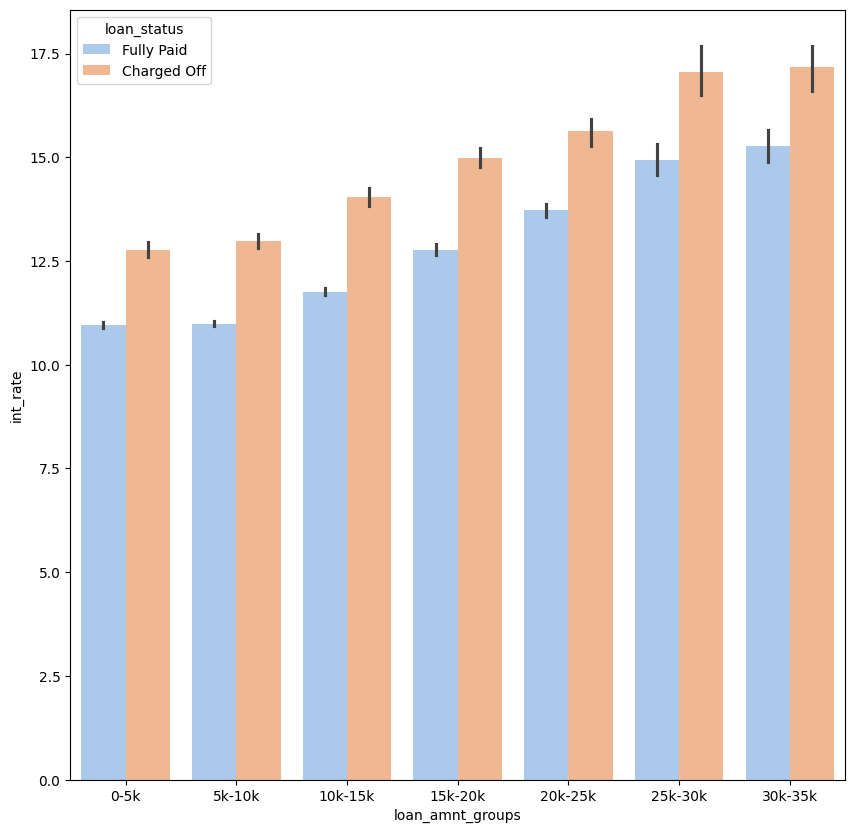

In [90]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

## EDA for Grade vs Interest rate

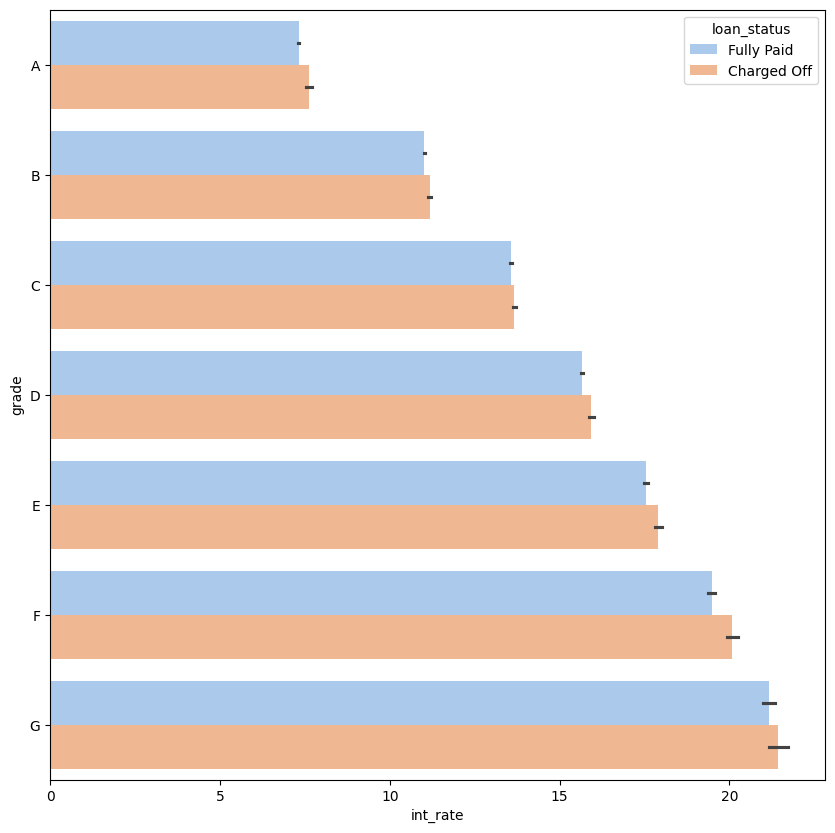

In [91]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<Figure size 640x480 with 0 Axes>

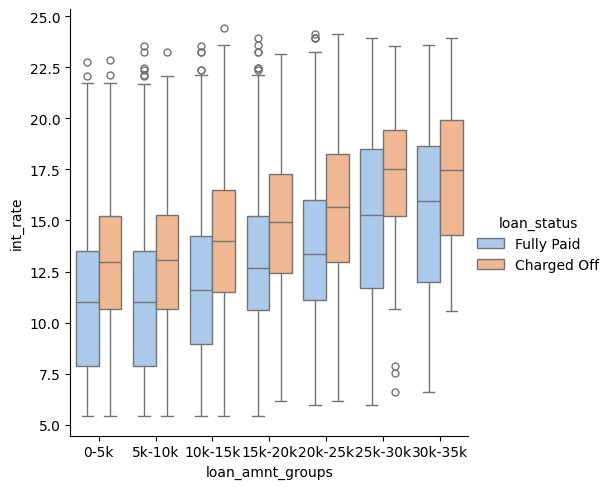

In [92]:
# fig,ax = plt.subplots(figsize = (15,6))
plt.tight_layout()
sns.catplot(data =data,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups.
- This can be a pretty strong driving factor for loan defaulting.

## EDA for Term and Loan amount

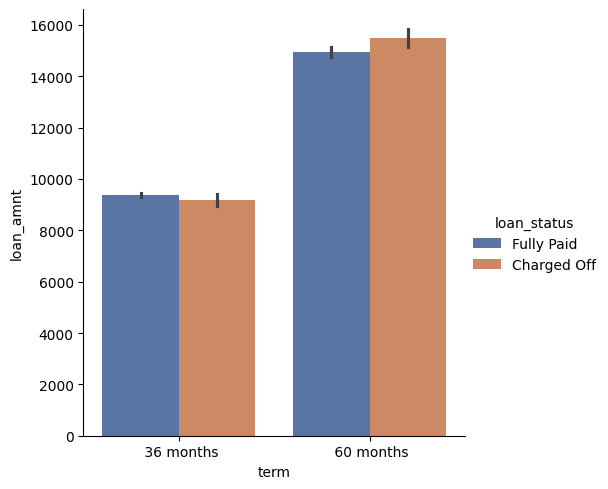

In [93]:
sns.catplot(x = 'term', y = 'loan_amnt', data = data,hue = 'loan_status', kind = 'bar')

Observation
- Applicants who applied and defaulted have no significant difference in loan_amounts.
- Which means that applicants applying for long term has applied for more loan.

## Correlation Matrix

Let's find the correlation between the variables/columns of out data set.

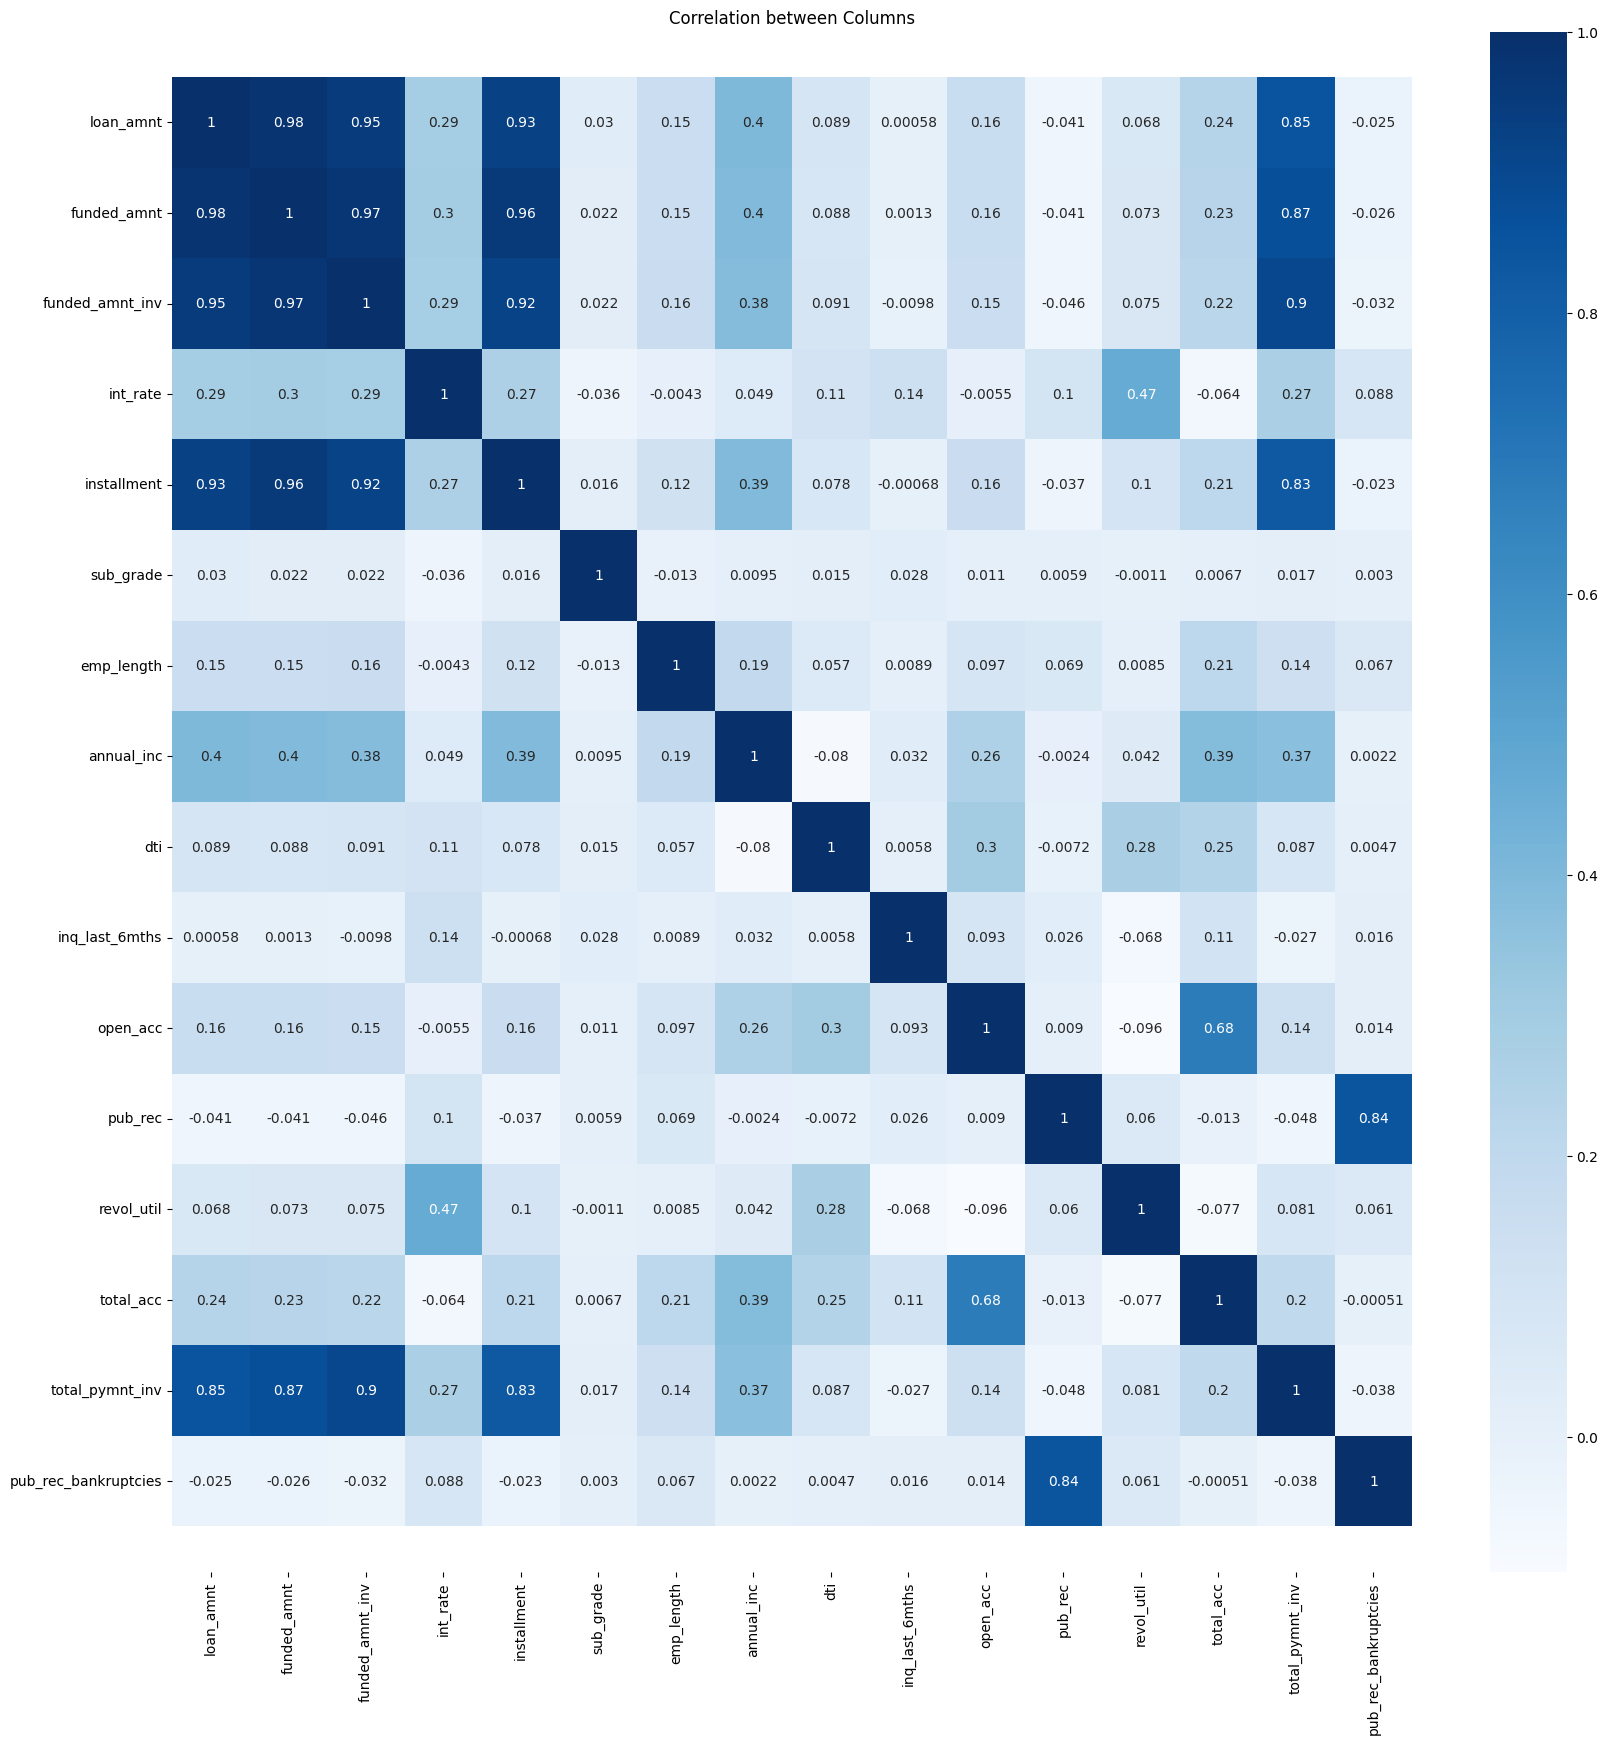

In [94]:
#Finding correlation matric
corr_matrix = data.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

**Observations**:  
* The public derogatory records colummn is highly (+ve) correlated with public bankruptcies records.   
* Interest rates are high for people with high revol utilisation.

# Observations and Recommendations based on Bivariate analysis

- There is a higher probability of defaulting among applicants who take out loans for 'home improvement' and have an annual income ranging from USD 65,000 to UD 70,000.

- Borrowers who own homes under 'MORTGAGE' status and earn between USD 60,000 and USD 70,000 annually are more likely to default.

- A heightened risk of default is associated with applicants who receive interest rates falling in the range of 21-24% and have an annual income between USD 70,000 and USD 80,000.

- Borrowers who take out loans in the range of USD 30,000 to USD 35,000 and are charged an interest rate between 15% and 17.5% exhibit an increased likelihood of default.

- Applicants who secure loans for small business purposes and have a loan amount exceeding USD 14,000 are more prone to default.

- Individuals with 'MORTGAGE' home ownership status and loans ranging from USD 14,000 to USD 16,000 have an elevated probability of default.

- When loans are graded as 'F' and fall within the loan amount range of USD 15,000 to USD 20,000, there is a higher likelihood of default.

- Borrowers with an employment length of 10 years who obtain loans between USD 12,000 and USD 14,000 are at an increased risk of default.

- Loans that are verified and have a loan amount exceeding $16,000 are associated with a greater probability of default.

- For loans graded as 'G' with interest rates surpassing 20%, there is an elevated likelihood of default.